# Data Exploration and Visualization

In this notebook we will focus on basic feature exploration and visualization of the train dataset.
<br>We will explore the distribution of the different features in the dataset and their correlations, especially with the target variable (deal_probability).</br>
<br>We will also check for missing values and try to understand which features are numerical and which are categorical.</br>
<br>Finally we will do a bit of exploration of the other datasets we received (the periods and active datasets) and try to understand the relation between the train and test datasets.</br>

## 1. Train Dataset Exploration
### 1.1 Basic Feature Exploration
1.1.1 User Id<br/>
1.1.2 User Type<br/>
1.1.3 Region<br/>
1.1.4 City<br/>
1.1.5 Categories<br/>
1.1.6 Parent Categories<br/>
1.1.7 Image Top 1<br/>
1.1.8 Dates<br/>
1.1.9 Item Seq Number<br/>
1.1.10 Price<br/>
1.1.11 Params<br/>
1.1.12 Missing Values<br/>
### 1.2.Feature Correlation
1.2.1 Pearson,Spearman,Kendall-tau<br/>
1.2.2 Mutual Information
### 1.3.Deal Classes
## 2. Train Active Dataset Exploration
## 3. Periods Train Dataset Exploration
## 4. Relation Between Train And Test Datasets

### Basic configurations:

In [2]:
import os
import os.path
import pandas as pd
import numpy as np
import datetime
import matplotlib
import pickle
import json
import googlemaps
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import seaborn as sns
from matplotlib import pyplot as plt
import transliterate as ts
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from compute_util import load_data
%matplotlib inline

In [3]:
mapbox_access_token = open('./helper_data/mapbox_token.txt', 'r').read()
matplotlib.rcParams['figure.figsize'] = (14.0, 7.0)

In [4]:
DATA_PATH = './data'
HELPER_DATA_PATH = './helper_data'

### Data loading:

In [5]:
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), parse_dates=['activation_date'])

In [9]:
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), parse_dates=['activation_date'])

### Translation:

The data is written in Russian, so we translated some of the text to English for visualization pruposes.

In [ ]:
for col_name in ['parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3']:
    trans_dict = json.load(open(HELPER_DATA_PATH + '//' + col_name + '_en.json', 'r'))
    train[col_name + '_en'] = train[col_name].apply(lambda t: trans_dict[t] if not pd.isnull(t) else t)

# train.csv

## Basic Feature Exploration

In [15]:
train.shape

(1503424, 23)

In [16]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability',
       'parent_category_name_en', 'category_name_en', 'param_1_en',
       'param_2_en', 'param_3_en'],
      dtype='object')

In [17]:
train.head(10)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,activation_date,user_type,image,image_top_1,deal_probability,parent_category_name_en,category_name_en,param_1_en,param_2_en,param_3_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Personal things,Goods for children and toys,Bed dress,NaN,NaN
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,For home and cottages,Furniture and interior,Other,NaN,NaN
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Consumer electronics,Audio and video,"Video, DVD and Blu-ray players",NaN,NaN
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Personal things,Goods for children and toys,Car seats,NaN,NaN
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Transport,Cars,With mileage,VAZ (LADA),2110
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,...,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323,Personal things,Goods for children and toys,Car seats,NaN,NaN
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,...,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000,For home and cottages,Repair and construction,Plumbing and sauna,NaN,NaN
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,...,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,0.80323,Personal things,"Clothes, shoes, accessories",Women&#39;s clothing,Jeans,26
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,...,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,0.00000,Personal things,"Clothes, shoes, accessories",Women&#39;s clothing,Dresses and skirts,&gt; 50 (XXL)
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,...,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,0.00000,Personal things,Children&#39;s clothing and footwear,For girls,Footwear,25


### User Id

Let's check the distribution of the user_id feature:

In [18]:
print(train.user_id.value_counts(),train.user_id.value_counts().describe(),sep = "\n\n")

45ba3f23bf25    1080
ee74bccca74f     980
60dfed1efb6e     907
b239811ad530     840
abcdd1ca1a5c     807
82348911d21c     752
a2ef0215eec3     695
b5003ea27e7a     684
2cd9f03d6527     657
82a96987d0f8     636
33d09dfdbd90     523
41f112adb74b     512
da6e825c0fdb     508
ac2280e23cbe     492
4bdf52a81f23     410
03082624a937     396
762434c0fd7e     382
743f3355d84a     370
4d2eb0bfc2a4     366
c2920abccec4     363
c337541311f8     361
9bdc2002bf51     360
818d647950cc     359
dc757d764977     355
1e19ac0f143f     354
838127830416     342
6be8de23ae72     340
b2f33d77e08a     340
b6f2091f0c0c     330
c4723507345b     329
                ... 
7132f43b27b4       1
ab9968e40c44       1
eb0ee4d77525       1
d604b19d0f3d       1
3e87fe7b1208       1
36c1a371e940       1
a5cd157f4058       1
09e0828c94ee       1
6d84cec44396       1
d74de595da73       1
126399a76da7       1
df374df53ad6       1
74bffc215187       1
633cac15b2fe       1
c5993ffece2c       1
e14229e0e7bc       1
251943528635 

Most users appear once or twice, but we have some outliers that we might want to further explore.
Let's check the distribution of the target variable as a functions of the user count:

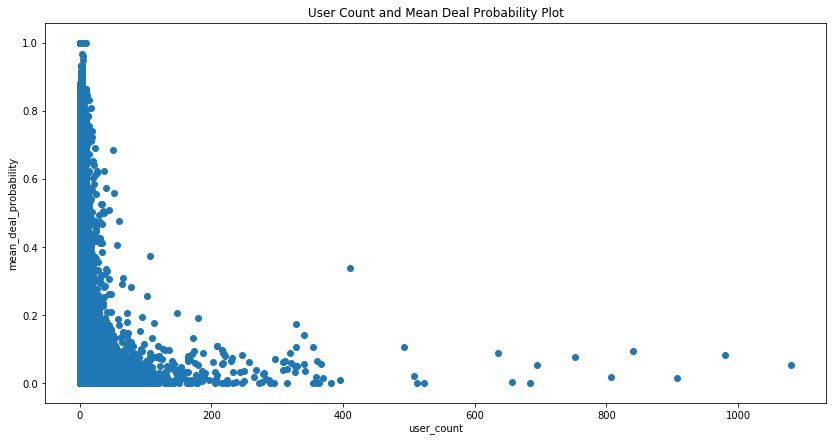

In [19]:
check = train[['user_id','deal_probability']]
user_mean = check.groupby('user_id').mean()
user_mean = user_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
user_count = check.groupby('user_id').count()
user_count = user_count.rename(columns = {'deal_probability' : 'user_count'})
new_df = user_mean.join(user_count)
plt.scatter(new_df['user_count'], new_df['mean_deal_probability'])
plt.title("User Count and Mean Deal Probability Plot")
plt.xlabel("user_count")
plt.ylabel("mean_deal_probability")
plt.show()

We can see that there is no obvious correlation between them. Let's confirm that assumption:

In [20]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  user_count
mean_deal_probability               1.000000   -0.055582
user_count                         -0.055582    1.000000
                       mean_deal_probability  user_count
mean_deal_probability               1.000000   -0.036278
user_count                         -0.036278    1.000000
                       mean_deal_probability  user_count
mean_deal_probability                1.00000    -0.03134
user_count                          -0.03134     1.00000


We might gain insights from exploring users that has several ads and their mean deal probability is really low or really high.
<br>We can search for power users and weak users:</br>
<br>Power Users - users with more than 10 ads, and mean deal probability >= 0.4</br>
<br>Weak Users - users with more than 10 ads, and mean deal probability <= 0.05</br>

In [21]:
power_users = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.user_count > 10) ]
print(power_users.sort_values(by = 'mean_deal_probability' , ascending = False).head(10))
weak_users = new_df[(new_df.mean_deal_probability <=0.05) & (new_df.user_count > 10) ]
print(weak_users.sort_values(by = 'mean_deal_probability' , ascending = True).head(10))

              mean_deal_probability  user_count
user_id                                        
1e385206d244               0.847509          11
cc64f7af92b1               0.833261          14
813caaee2df7               0.809858          17
9b3d419e34b5               0.785030          11
55c1e63aa8b0               0.785030          12
389a4c70a84c               0.785029          12
8b07fb855dd3               0.754731          14
9872399c0349               0.741417          18
f3d5d5dd61ec               0.728956          14
d5d20e58d6d6               0.726449          11
              mean_deal_probability  user_count
user_id                                        
4d8ebeb108ec                    0.0          11
61d48ebafbea                    0.0          11
61d4b0ef0694                    0.0          12
61d8ab6b1032                    0.0          11
bd14b235d185                    0.0          16
bd0438832fe1                    0.0          17
6214c3049fc6                    0.0     

Then add a boolean feature for them:

In [22]:
index_1 = list(power_users.index)
train['is_power_user'] = np.isin(train['user_id'], index_1)
print("Number of power users:")
print(train[train['is_power_user'] == True].shape[0]/ train.shape[0]*100)

Number of power users:
0.15504608147801285


In [23]:
index_2 = list(weak_users.index)
train['is_weak_user'] = np.isin(train['user_id'], index_2)
print("Number of weak users:")
print(train[train['is_weak_user'] == True].shape[0]/ train.shape[0]*100)

Number of weak users:
9.643254331446085


### User Type

Let's check the distribution of the user_type feature:

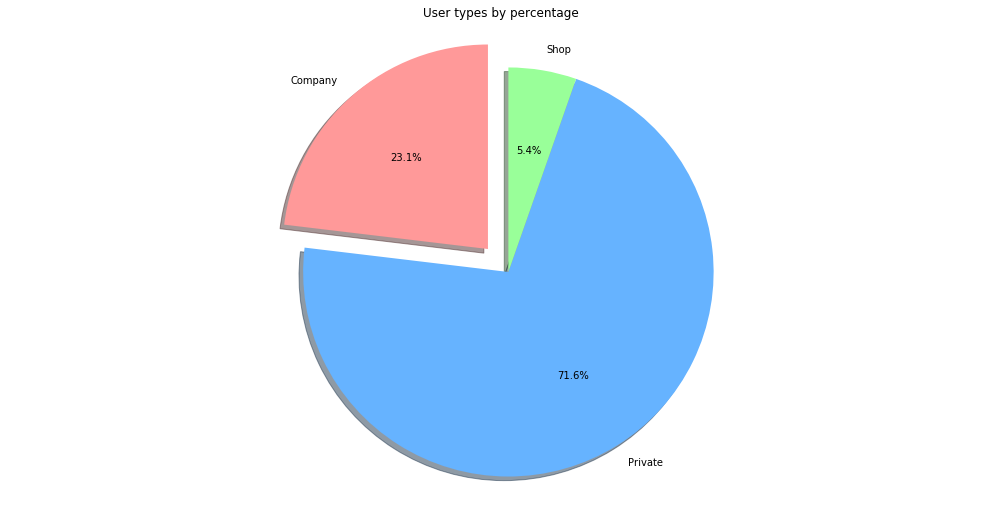

In [24]:
user_type_dist = train.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

Let's check the distribution of the user_type feature for power and weak users:

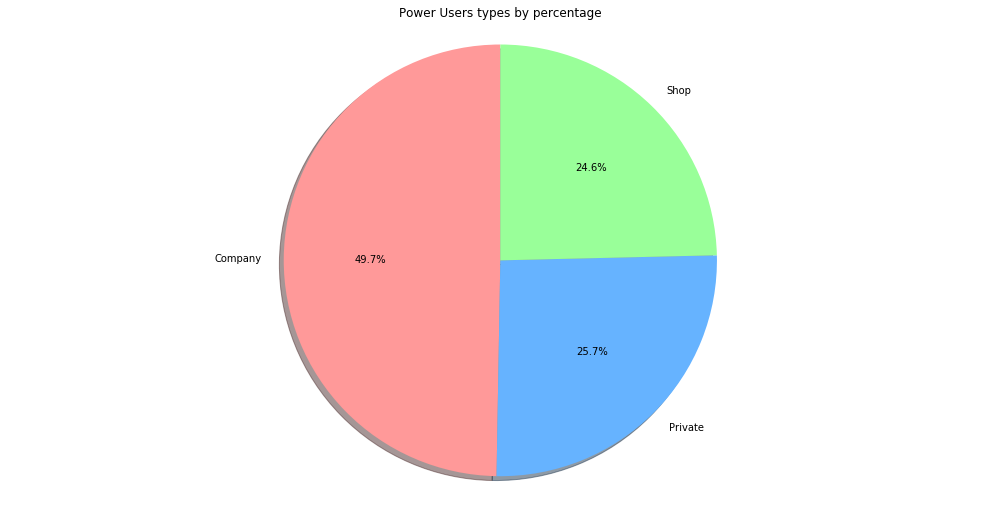

In [25]:
check = train[['user_id', 'user_type']]
check.set_index('user_id', inplace = True)
user_type_dist = power_users.join(check).groupby('user_type').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Power Users types by percentage')
plt.show()

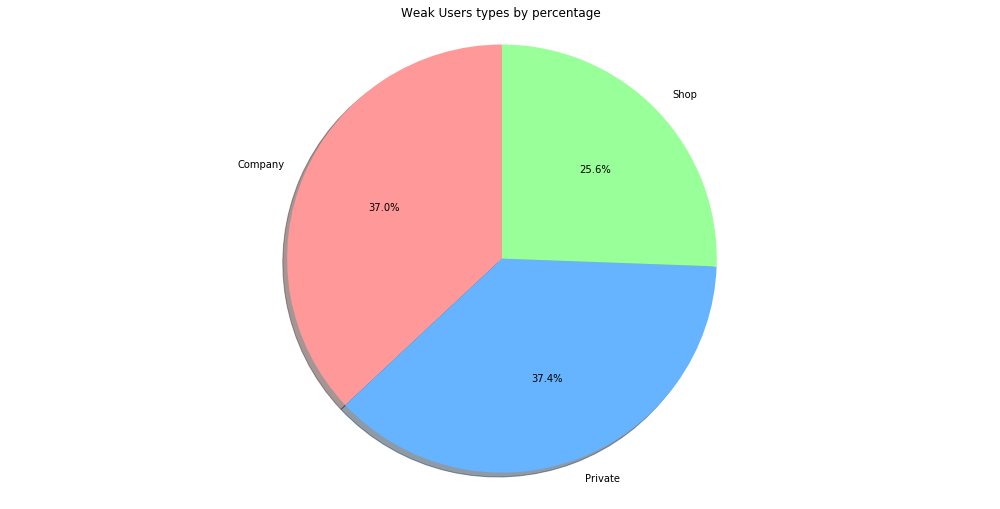

In [26]:
check = train[['user_id', 'user_type']]
check.set_index('user_id', inplace = True)
user_type_dist = weak_users.join(check).groupby('user_type').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Weak Users types by percentage')
plt.show()

Let's view the mean deal probability for each user type:

In [27]:
print(train.groupby('user_type')['deal_probability'].mean())

user_type
Company    0.124513
Private    0.149557
Shop       0.062829
Name: deal_probability, dtype: float64


We can see that over 70% of the items are from private users.
Also, shops have only 5% of the items and their deal_probability is significantly low.
We can also see that the 'power users' we found have a significantly different user_type distribution - almost 50% of them are companies and 25% of them are shops.
The 'weak users' also have different distribution - 37% of them are comapnies,37% of them are private and 25% are shops.

### Region

First let's check how many regions we have:

In [28]:
print('Number of regions:', train['region'].nunique())

Number of regions: 28


Now let's explore the distribution of the target feature and the price by each region: 

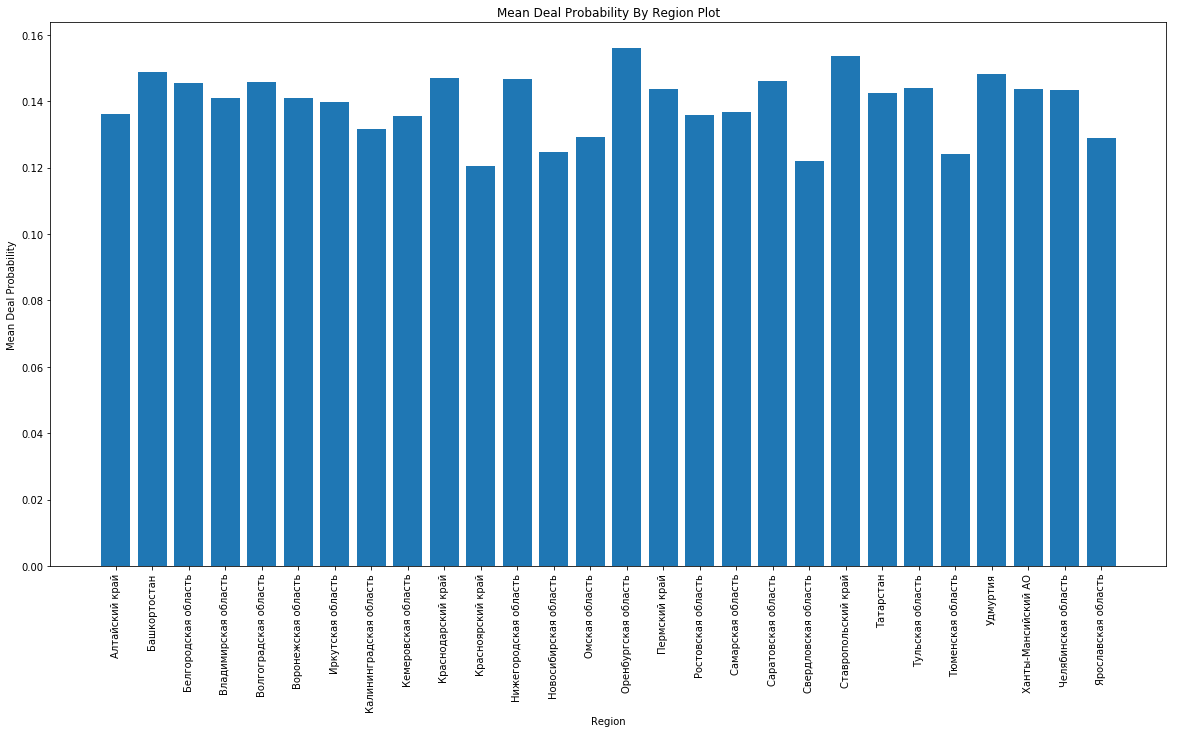

In [29]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
mean_deal_prob = train.groupby('region')['deal_probability'].mean()
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean Deal Probability By Region Plot')
plt.xlabel('Region')
plt.ylabel('Mean Deal Probability')
plt.show()

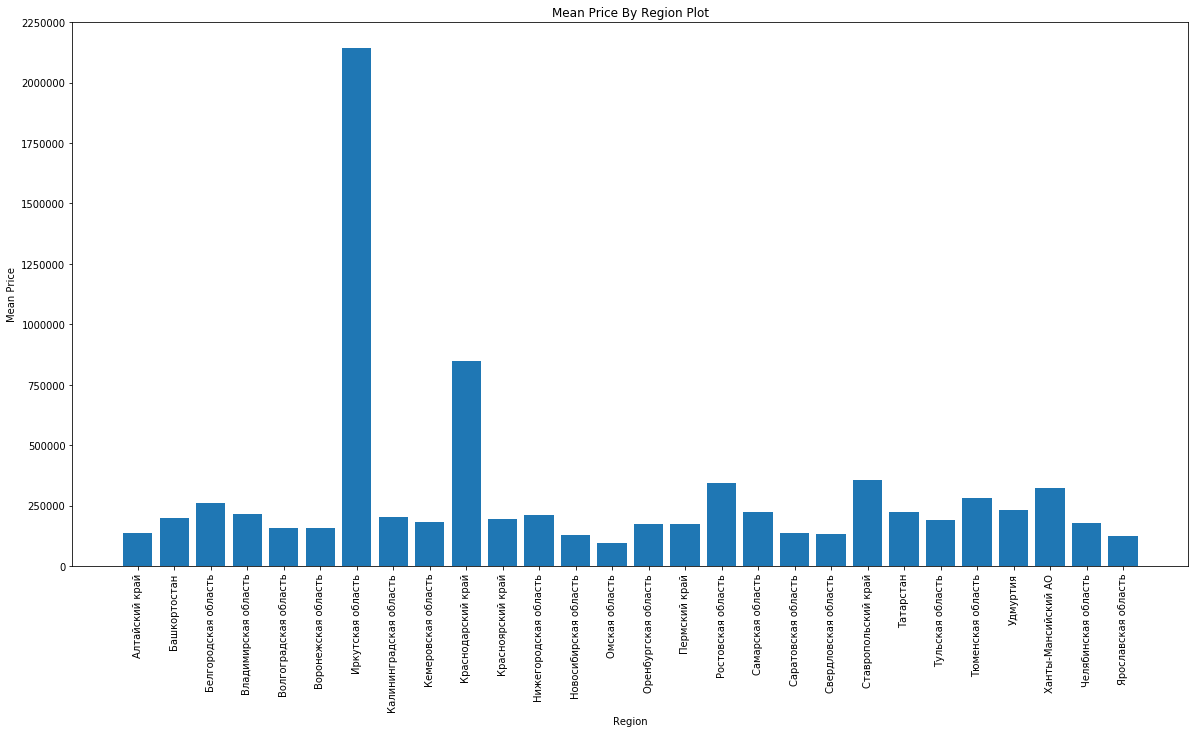

In [30]:
mean_price = train.groupby('region')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Region Plot')
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.show()

#### Top 3 regions by mean_price:

In [31]:
print(mean_price.head(3))

region
Иркутская область      2.141739e+06
Краснодарский край     8.466639e+05
Ставропольский край    3.557127e+05
Name: price, dtype: float64


We can see that there isn't much of a connection between the region and the deal probabilty.
<br>We also see that there are 2 regions with really high mean_price in comparison to the other regions.</br>

### City

Let's make the same exploration we did for the 'region' feature:

In [32]:
print('Number of cities:', train['city'].nunique())

Number of cities: 1733


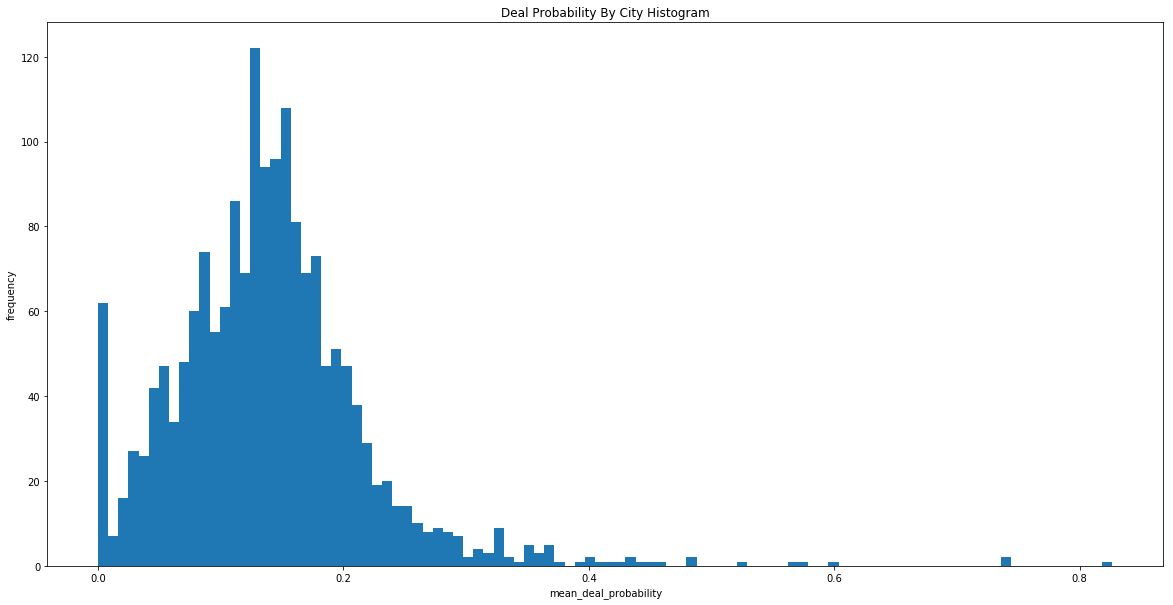

In [33]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
mean_deal_prob = train.groupby('city')['deal_probability'].mean().sort_values(ascending=False)
plt.hist(mean_deal_prob, bins = 100)
plt.title("Deal Probability By City Histogram")
plt.xlabel("mean_deal_probability")
plt.ylabel("frequency")
plt.show()

#### Top 5 cities by mean_deal_probablility:

In [34]:
print(mean_deal_prob.head(5))

city
Приволжский      0.826680
Матмасы          0.737600
Виля             0.737600
Быстрогорский    0.595410
Бурлацкое        0.571207
Name: deal_probability, dtype: float64


We found some cities with really high deal_probability.
<br>Let's check if there are cities with high probability and at least 10 itmes:</br>

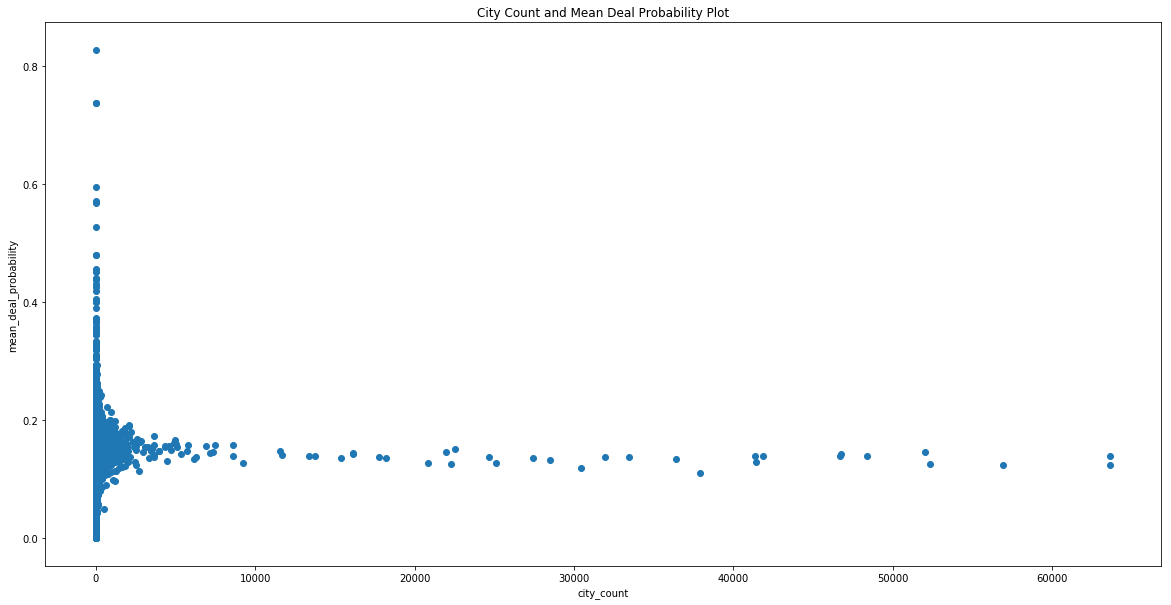

In [35]:
check = train[['city','deal_probability']]
city_mean = check.groupby('city').mean()
city_mean = city_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
city_count = check.groupby('city').count()
city_count = city_count.rename(columns = {'deal_probability' : 'city_count'})
new_df = city_mean.join(city_count)
plt.scatter(new_df['city_count'], new_df['mean_deal_probability'])
plt.title("City Count and Mean Deal Probability Plot")
plt.xlabel("city_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [36]:
outliers = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.city_count > 10) ]
print(outliers.sort_values(by = 'mean_deal_probability' , ascending = False))

Empty DataFrame
Columns: [mean_deal_probability, city_count]
Index: []


We can see that there aren't any interesting cities (by our definition)

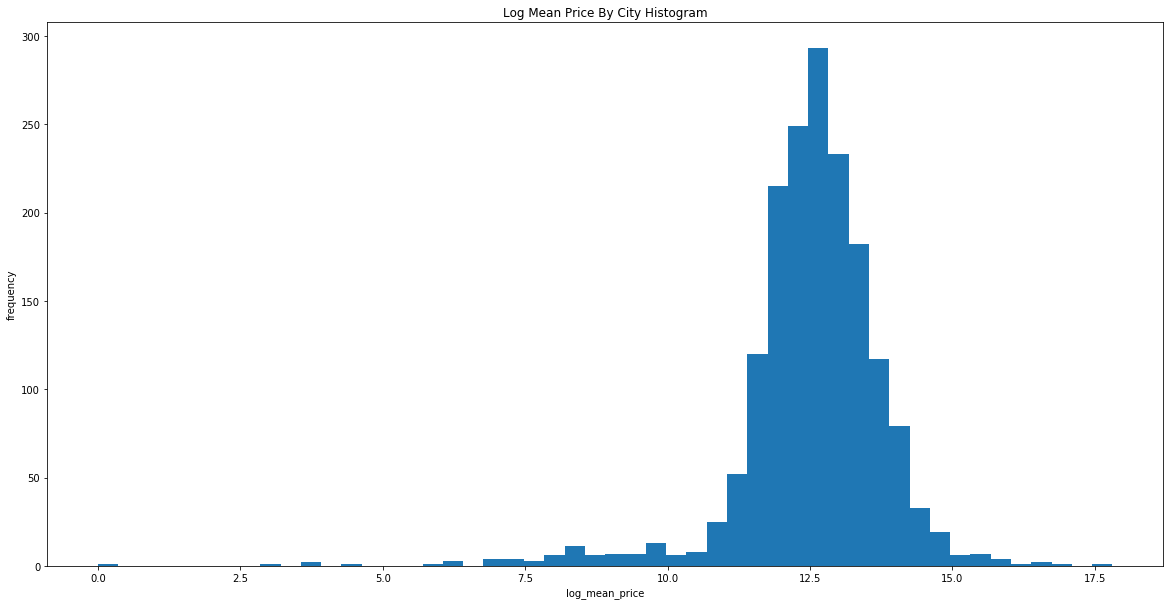

In [37]:
mean_price = train.groupby('city')['price'].mean().sort_values(ascending=False)
mean_price.dropna(inplace = True)
log_mean_price = np.log(mean_price)
plt.hist(log_mean_price, bins = 50)
plt.title("Log Mean Price By City Histogram")
plt.xlabel("log_mean_price")
plt.ylabel("frequency")
plt.show()

#### Top 5 cities by log_mean_price:

In [38]:
print(log_mean_price.head(5))

city
Усолье-Сибирское    17.809099
Черноерковская      17.034386
Сокур               16.647370
Дмитриевка          16.523569
Ишня                16.108045
Name: price, dtype: float64


We can see that the log of the mean price histogram is close to a normal distribution (with mean = 12.5)

### Categories

Let's check the distribution of items, price and deal probability amongst the different categories:

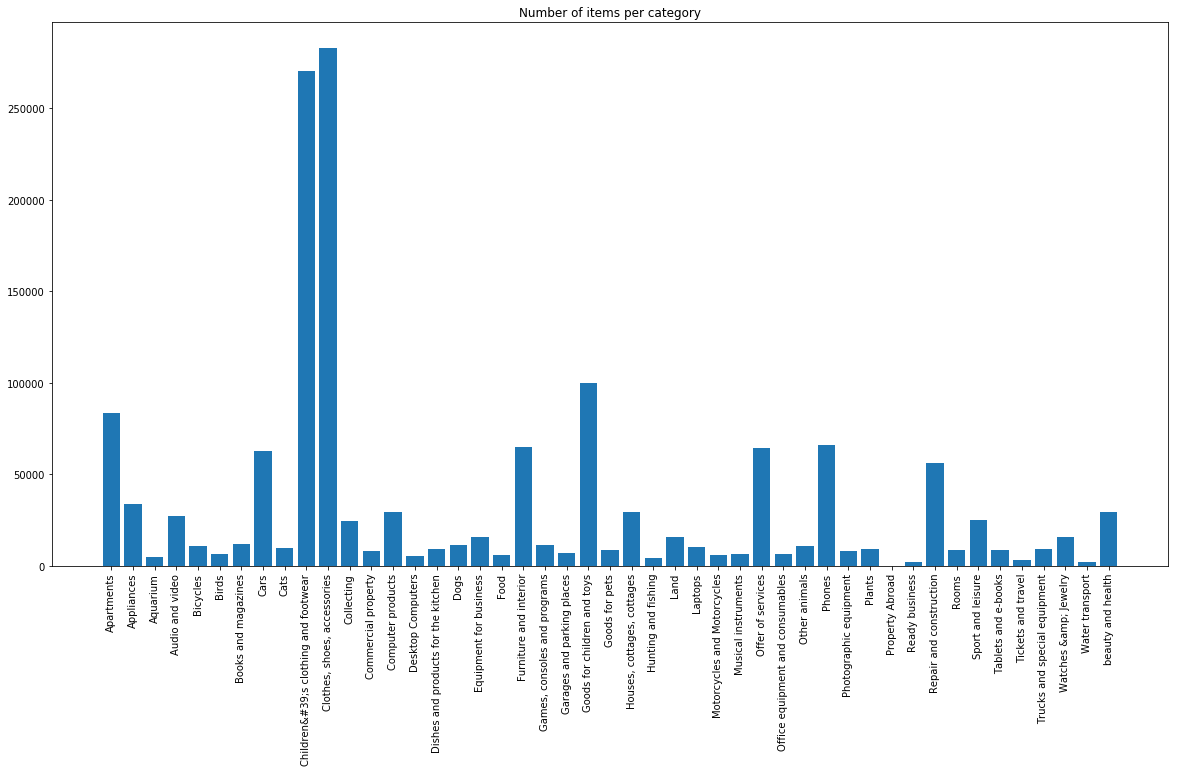

In [39]:
category_counts = train.groupby('category_name_en')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category')
plt.show()

#### Top 5 categories by count:

In [40]:
print(category_counts.head(5))

category_name_en
Clothes, shoes, accessories             282753
Children&#39;s clothing and footwear    270359
Goods for children and toys              99747
Apartments                               83670
Phones                                   65944
Name: item_id, dtype: int64


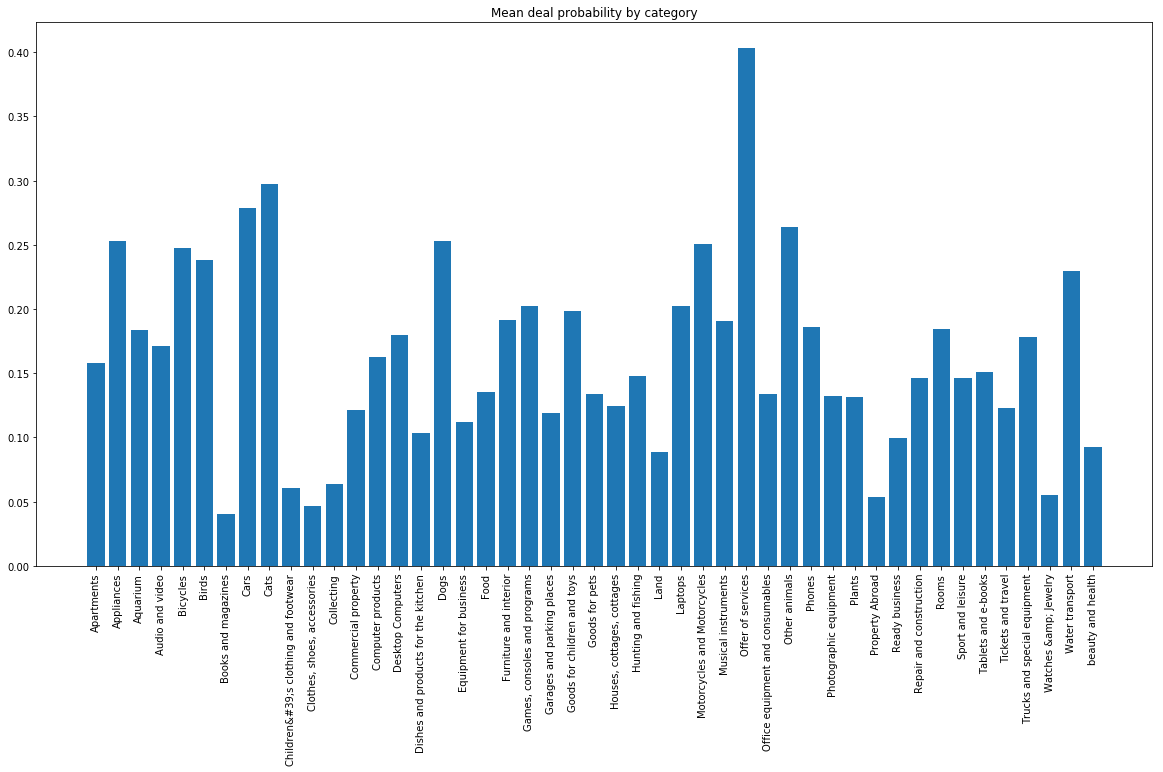

In [41]:
mean_deal_prob = train.groupby('category_name_en')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean deal probability by category')
plt.show()

#### Top 5 categories by mean_deal_probability:

In [42]:
print(mean_deal_prob.head(5))

category_name_en
Offer of services    0.403123
Cats                 0.297259
Cars                 0.278427
Other animals        0.264051
Dogs                 0.252812
Name: deal_probability, dtype: float64


#### Worst 5 categories by mean_deal_probability:

In [43]:
print(mean_deal_prob.tail(5))

category_name_en
Children&#39;s clothing and footwear    0.060834
Watches &amp; Jewelry                   0.055316
Property Abroad                         0.053534
Clothes, shoes, accessories             0.046447
Books and magazines                     0.040673
Name: deal_probability, dtype: float64


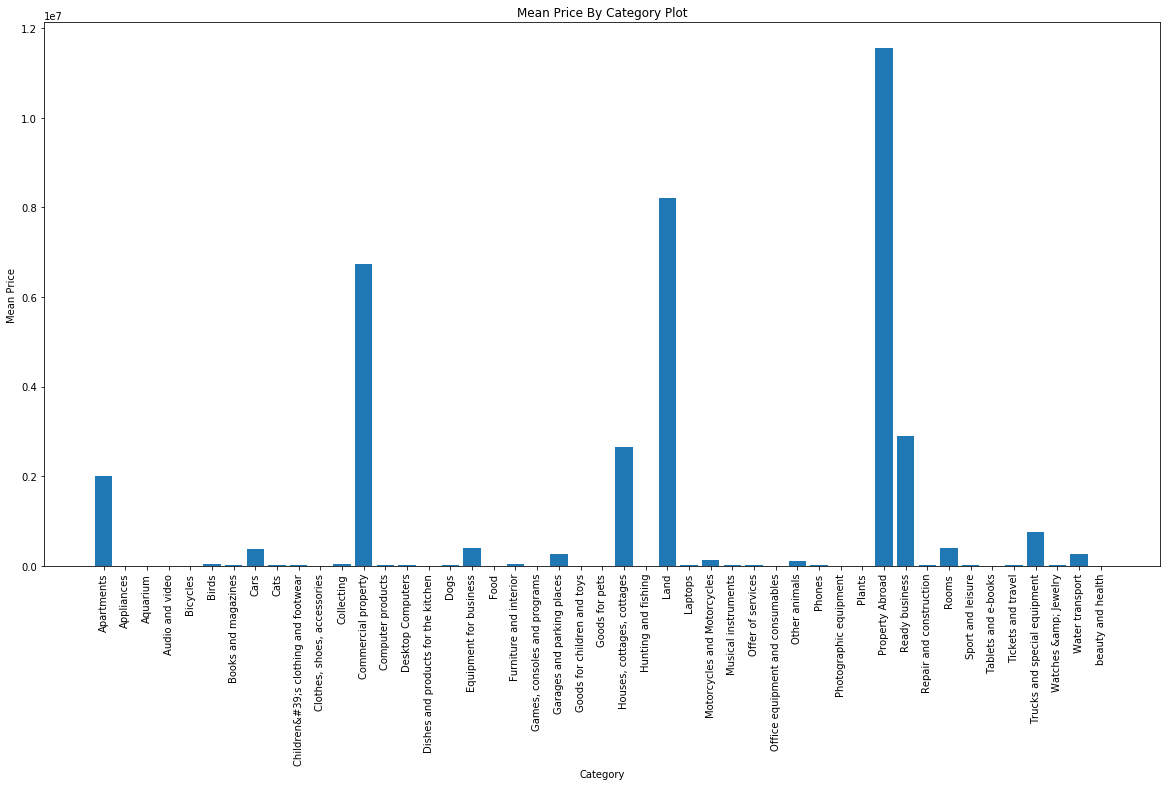

In [44]:
mean_price = train.groupby('category_name_en')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Category Plot')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()

In [45]:
print(mean_price.head(5))

category_name_en
Property Abroad               1.154915e+07
Land                          8.210750e+06
Commercial property           6.735045e+06
Ready business                2.906996e+06
Houses, cottages, cottages    2.651154e+06
Name: price, dtype: float64


We can see that most items are from the 'Children's clothing and footwear' category and the 'clothes,shoes,accessories'.
<br>We can  also see that the 'Offer of services' category has really high deal_probability (0.4) and the 'cars' cetegory and some animal categories also has relatively high deal_probability. </br>
<br>We can  also see that there are several categories with really low deal probability (<=0.05). </br>
<br>Finally we saw that the price per category is really diverse. </br>

### Parent Categories

Let's make similar exploration for the parent categories:

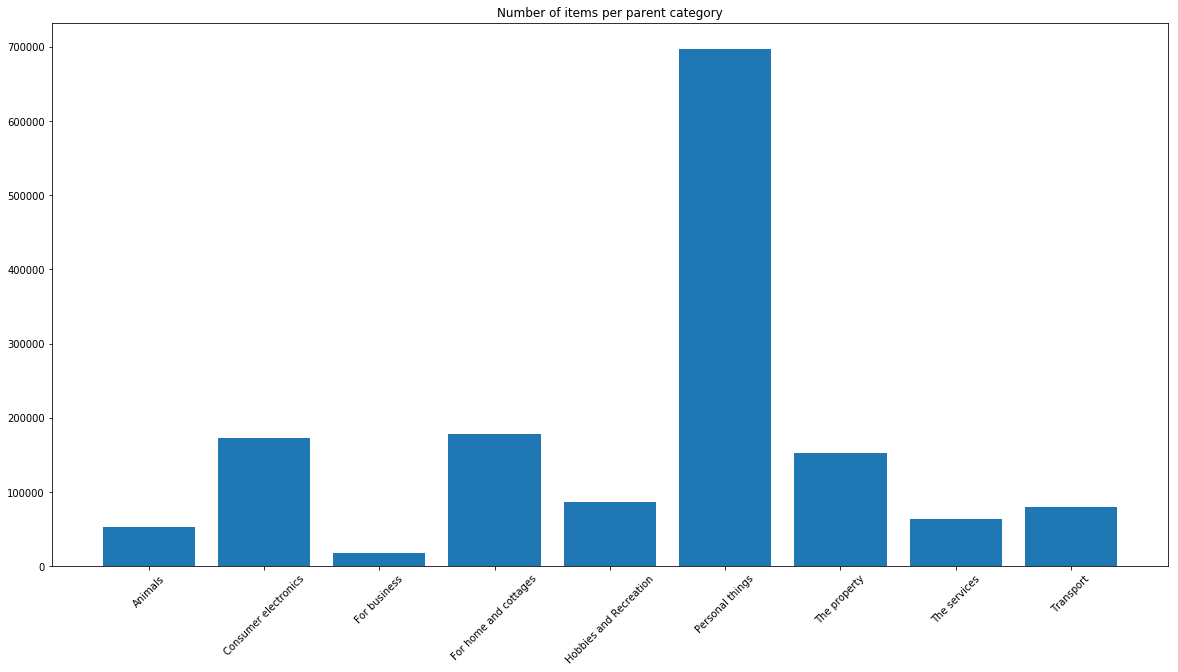

In [46]:
parent_category_counts = train.groupby('parent_category_name_en')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(parent_category_counts.index, parent_category_counts.values)
plt.title('Number of items per parent category')
plt.show()

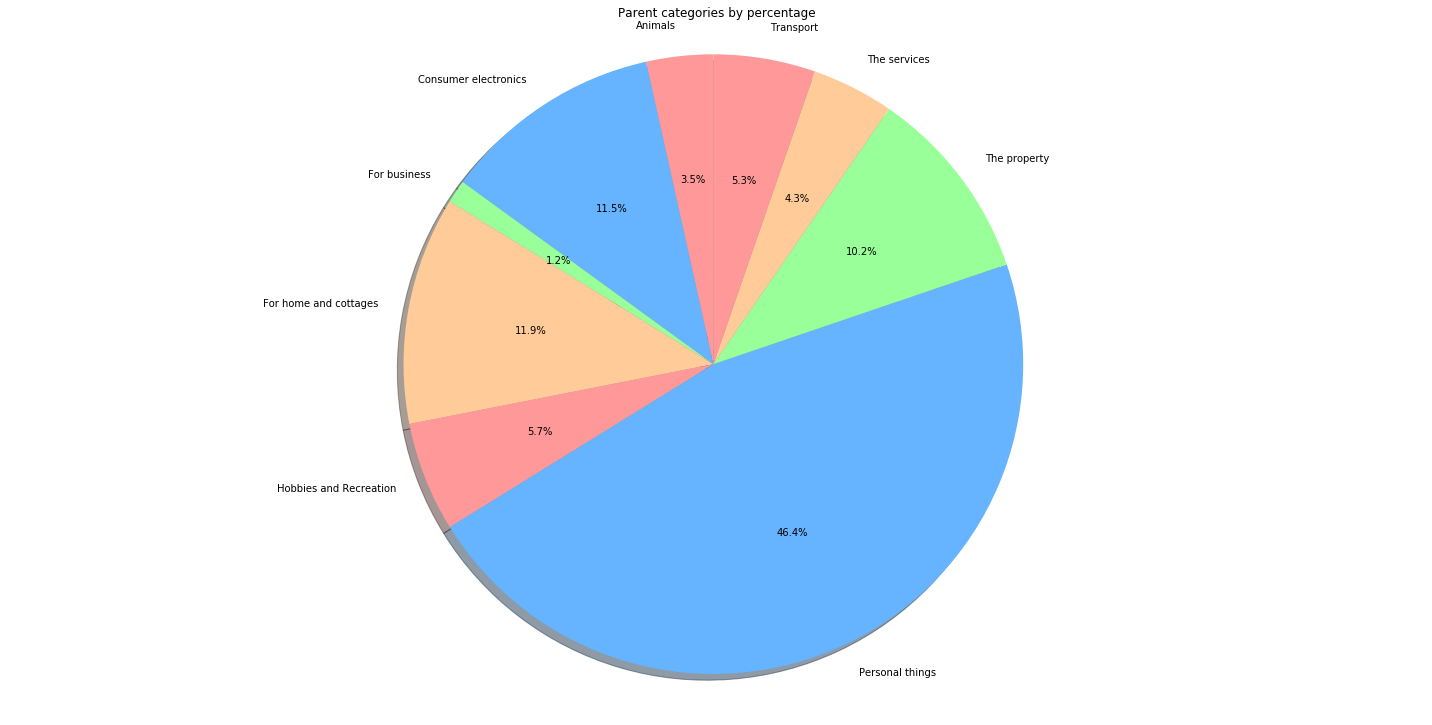

In [47]:
parent_category_dist = train.groupby('parent_category_name_en').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage')
plt.show()

#### Top 3  parent categories by count:

In [48]:
print(parent_category_counts.head(3))

parent_category_name_en
Personal things          697623
For home and cottages    178823
Consumer electronics     173008
Name: item_id, dtype: int64


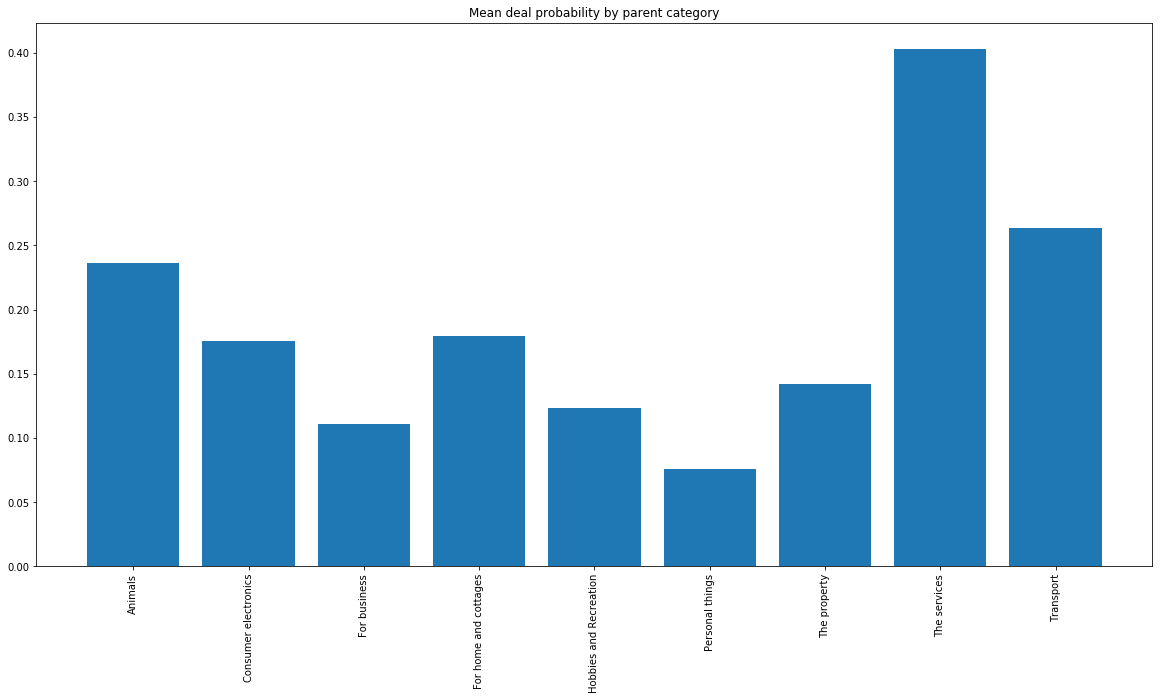

In [49]:
mean_deal_prob = train.groupby('parent_category_name_en')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean deal probability by parent category')
plt.show()

#### Top 3 parent categories by mean_deal_probability:

In [50]:
print(mean_deal_prob.head(3))

parent_category_name_en
The services    0.403123
Transport       0.263336
Animals         0.235957
Name: deal_probability, dtype: float64


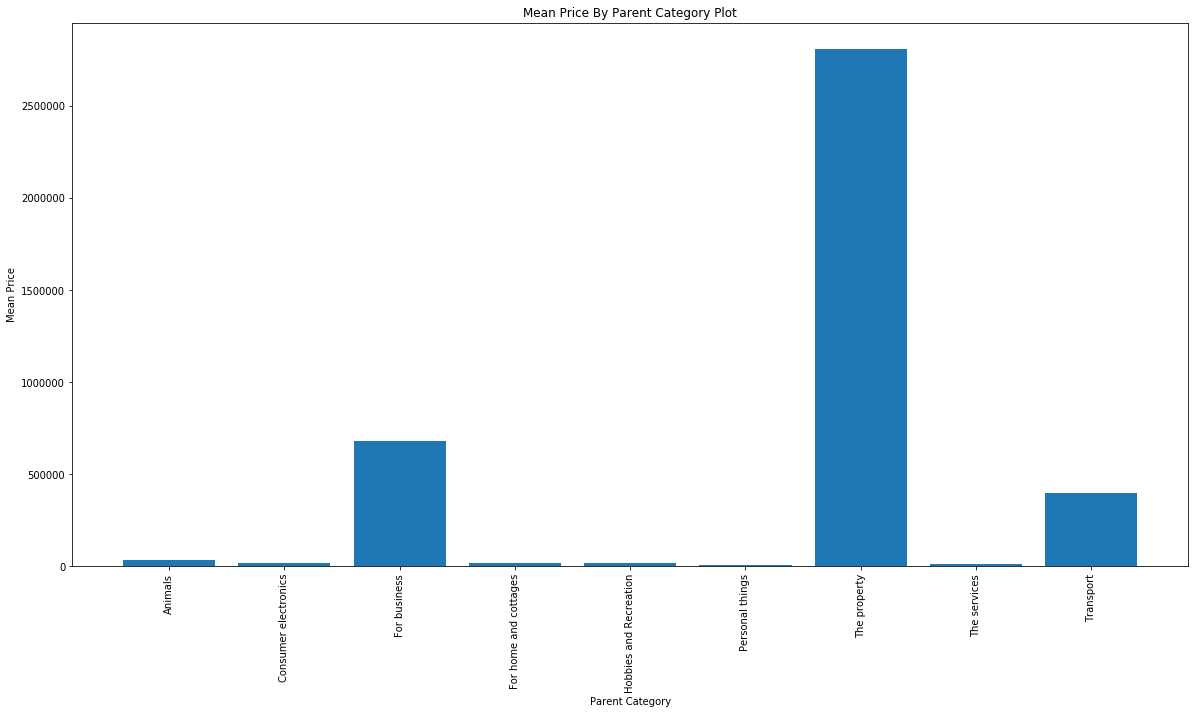

In [51]:
mean_price = train.groupby('parent_category_name_en')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Parent Category Plot')
plt.xlabel('Parent Category')
plt.ylabel('Mean Price')
plt.show()

We can see that large majority (almost 50%) of items are from the 'Personal things' parent category and their deal probability is really low (~0.07).
<br>We can also see that 'The services', 'Transport' and 'Animals' parent categories have the highest deal_probability (but there aren't many items from those categories)</br>
<br>Finally we saw that the propery category has really high price and the variance between prices per parent category is really high.</br>

### Image top 1

Image top 1 is a really interesting feature - it is unclear how it was determined by Avito.
<br>We need to decide weather to use it as a numerical feature or a categorical feature.</br>
<br>In order to do that we would like to check how many unique values are and what is the correlation between this image and the target variable</br>

In [52]:
print('Number of image_top_1 values:', train['image_top_1'].nunique())

Number of image_top_1 values: 3062


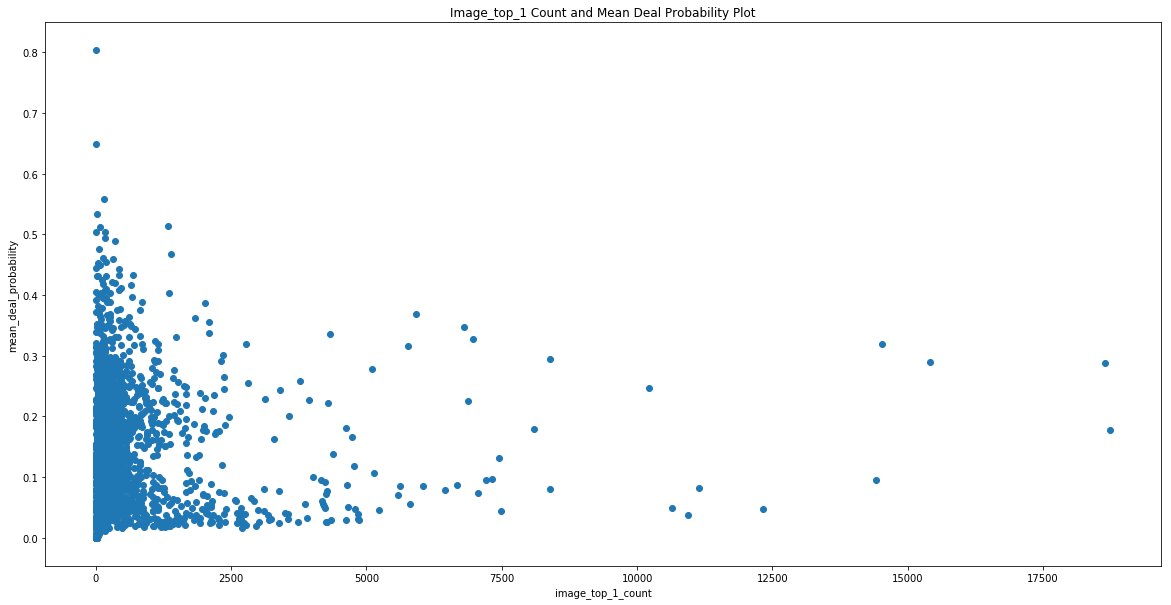

In [53]:
check = train[['image_top_1','deal_probability']]
image_top_1_mean = check.groupby('image_top_1').mean()
image_top_1_mean = image_top_1_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
image_top_1_count = check.groupby('image_top_1').count()
image_top_1_count = image_top_1_count.rename(columns = {'deal_probability' : 'image_top_1_count'})
new_df = image_top_1_mean.join(image_top_1_count)
plt.scatter(new_df['image_top_1_count'], new_df['mean_deal_probability'])
plt.title("Image_top_1 Count and Mean Deal Probability Plot")
plt.xlabel("image_top_1_count")
plt.ylabel("mean_deal_probability")
plt.show()

#### Correlation between image_top_1 value and deal_probability:

In [54]:
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                  image_top_1  deal_probability
image_top_1          1.000000          0.189979
deal_probability     0.189979          1.000000
                  image_top_1  deal_probability
image_top_1          1.000000          0.267342
deal_probability     0.267342          1.000000
                  image_top_1  deal_probability
image_top_1          1.000000          0.200738
deal_probability     0.200738          1.000000


#### Correlation between image_top_1 count and mean_deal_probability:

In [55]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  image_top_1_count
mean_deal_probability                1.00000            0.00289
image_top_1_count                    0.00289            1.00000
                       mean_deal_probability  image_top_1_count
mean_deal_probability               1.000000           0.034157
image_top_1_count                   0.034157           1.000000
                       mean_deal_probability  image_top_1_count
mean_deal_probability               1.000000           0.024247
image_top_1_count                   0.024247           1.000000


It is unclear weather this feature should be treated as a numerical feature or categorical feature.
<br>On the one hand, it has a quite small set of unique values (about 3000).</br>
<br>On the other hand it has quite high linear and monotonic correlation with the target variable (pearson,spearman).</br>
<br>We will need to test our models to decide what is the better approach.</br>

Let's try to explore some interesting images (with at least 0.4 deal probability and at least 10 items):

In [56]:
power_images = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.image_top_1_count  > 10) ]
print(power_images.sort_values(by = 'mean_deal_probability' , ascending = False).head(10))

             mean_deal_probability  image_top_1_count
image_top_1                                          
1796.0                    0.558288                147
1844.0                    0.533462                 33
1784.0                    0.514011               1334
1851.0                    0.512150                 85
1804.0                    0.504322                172
1808.0                    0.494134                168
1846.0                    0.489233                360
1850.0                    0.476196                 55
2275.0                    0.468331               1393
1853.0                    0.461065                142


Let's add a boolean feature for power images:

In [57]:
index_1 = list(power_images.index)
train['is_power_image'] = np.isin(train['image_top_1'], index_1)
print(train[train['is_power_image'] == True].shape[0]/ train.shape[0]*100)

0.7389133072240432


### Dates

In [58]:
print('Number of activation_date values:', train['activation_date'].nunique())

Number of activation_date values: 21


We can see that the activation dates are in a small interval of about 20 days.
<br>Let's extract the weekday,month and day from the date feature and explore them:</br>

In [59]:
train['weekday'] = train.activation_date.dt.weekday
train['month'] = train.activation_date.dt.month
train['day'] = train.activation_date.dt.day

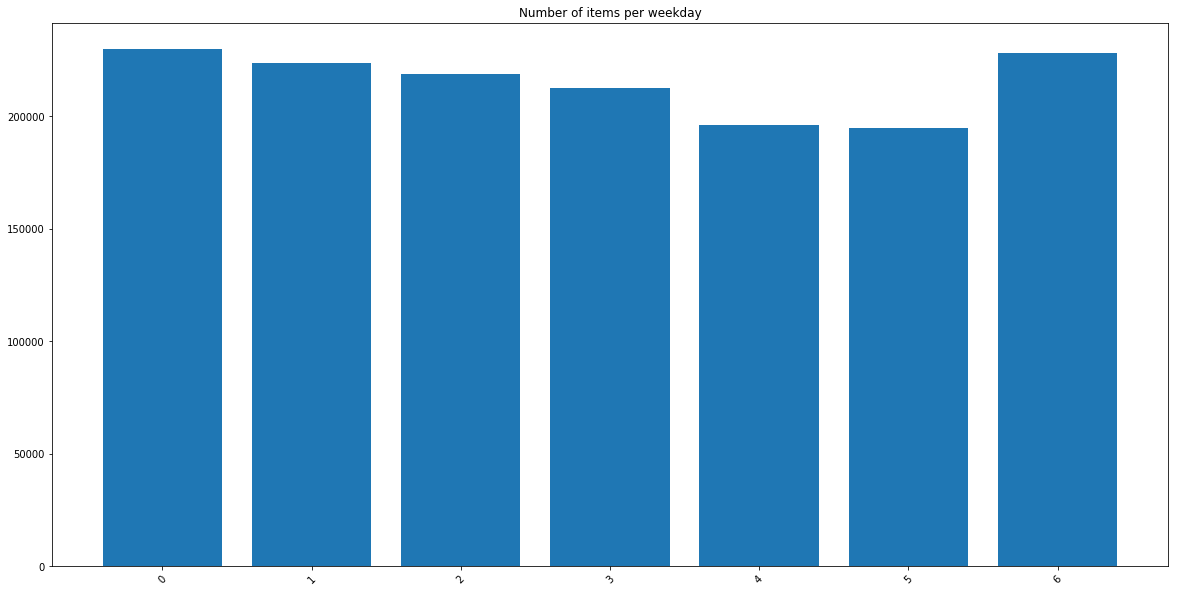

In [60]:
weekday_counts = train.groupby('weekday')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday')
plt.show()
# 0 is Monday, 6 is Sunday

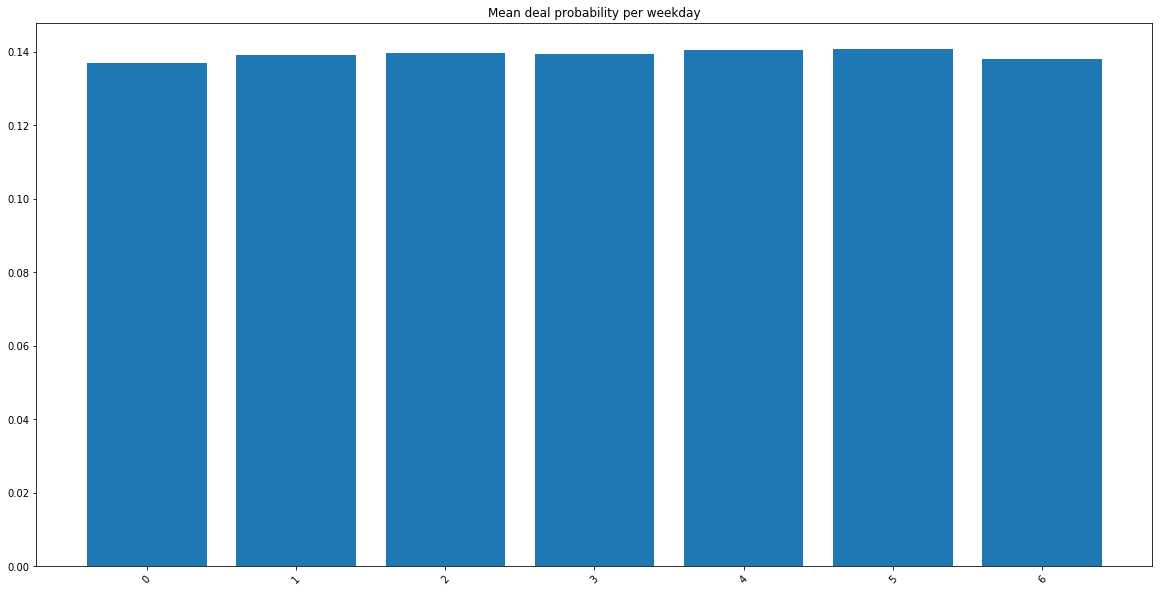

In [61]:
weekday_deal_prob = train.groupby('weekday')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_deal_prob.index, weekday_deal_prob.values)
plt.title('Mean deal probability per weekday')
plt.show()

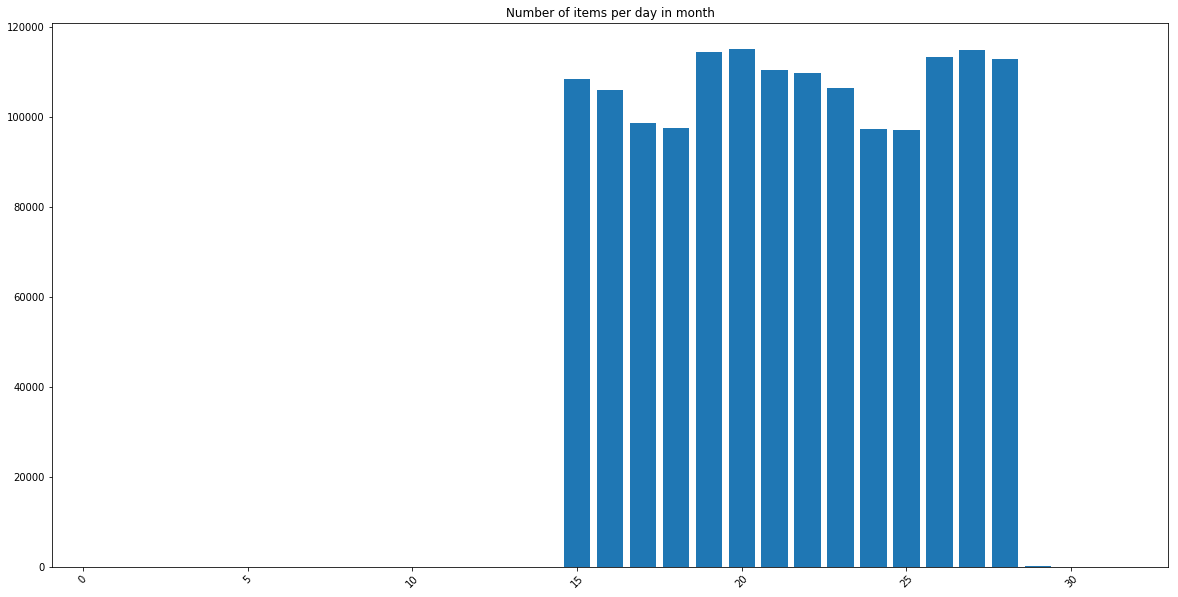

In [62]:
day_counts = train.groupby('day')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(day_counts.index, day_counts.values)
plt.title('Number of items per day in month')
plt.show()

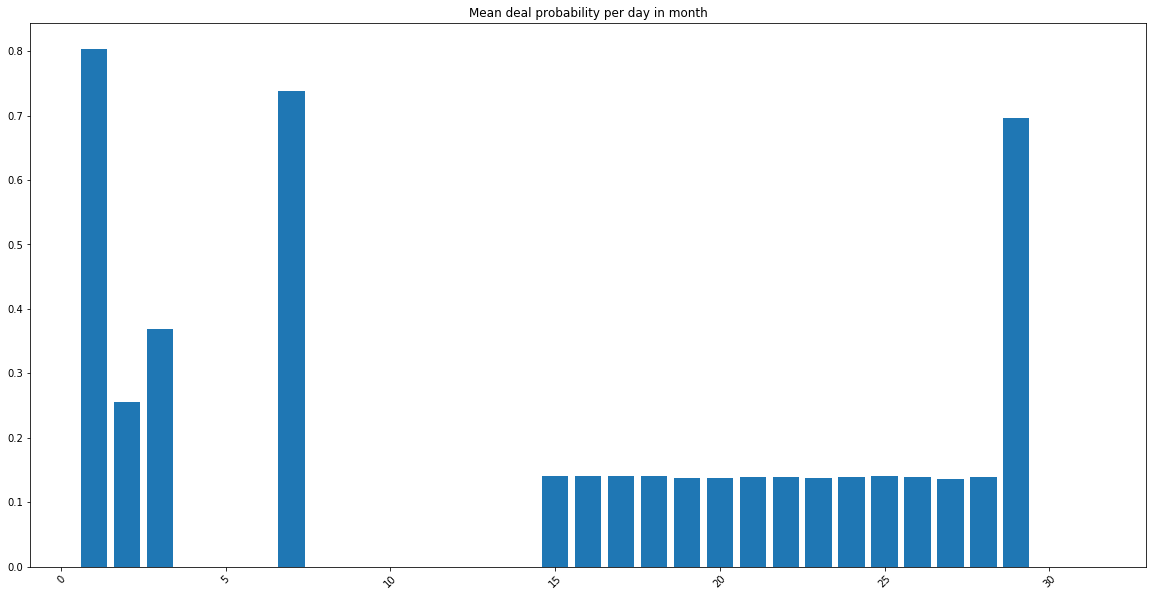

In [63]:
day_deal_prob = train.groupby('day')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(day_deal_prob.index, day_deal_prob.values)
plt.title('Mean deal probability per day in month')
plt.show()

We can see that there isn't much to deduce from the date feature regarding the target variable

### Item Seq Number

The item seq number feature is similar to the image top 1 feature in the way that it is unclear weather it should be categorical or numerical.
<br>Therefore we will make a similar analysis to the one we made for the image_top_1 feature
<br> Let's see how many unique values it has:</br>

In [64]:
print('Number of item_seq_number values:', train['item_seq_number'].nunique())

Number of item_seq_number values: 28232


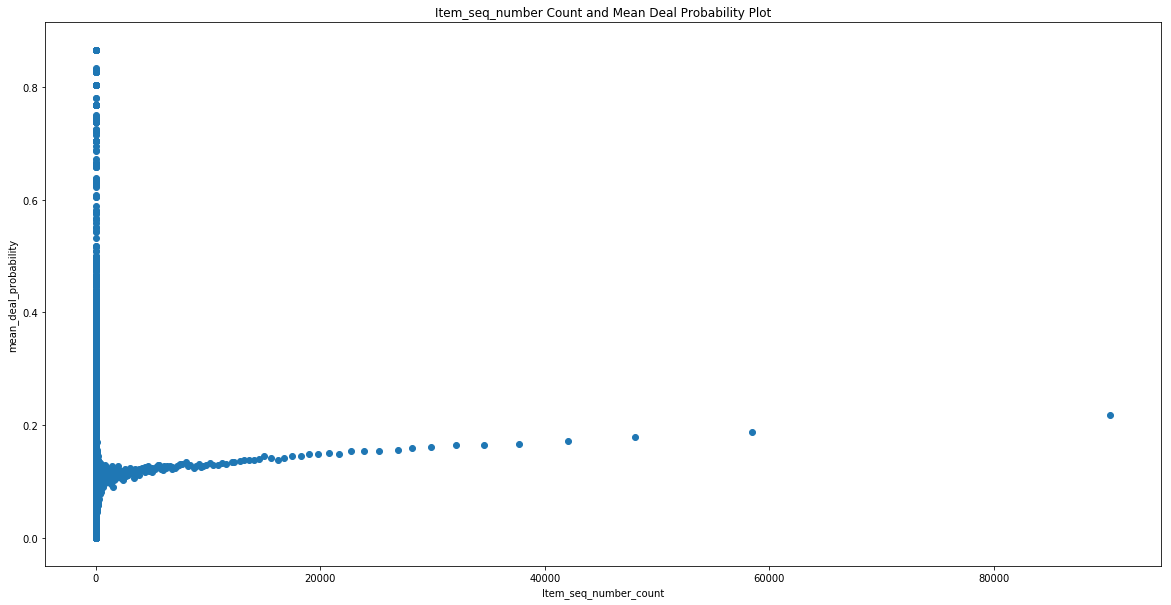

In [65]:
check = train[['item_seq_number','deal_probability']]
item_seq_number_mean = check.groupby('item_seq_number').mean()
item_seq_number_mean = item_seq_number_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
item_seq_number_count = check.groupby('item_seq_number').count()
item_seq_number_count = item_seq_number_count.rename(columns = {'deal_probability' : 'item_seq_number_count'})
new_df = item_seq_number_mean.join(item_seq_number_count)
plt.scatter(new_df['item_seq_number_count'], new_df['mean_deal_probability'])
plt.title("Item_seq_number Count and Mean Deal Probability Plot")
plt.xlabel("Item_seq_number_count")
plt.ylabel("mean_deal_probability")
plt.show()

We can see a steady increase between the number of items with the same item_seq_number and the deal probability.

#### Correlation between item_seq_number value and deal_probability:

In [66]:
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                  item_seq_number  deal_probability
item_seq_number          1.000000         -0.035744
deal_probability        -0.035744          1.000000
                  item_seq_number  deal_probability
item_seq_number          1.000000         -0.169091
deal_probability        -0.169091          1.000000
                  item_seq_number  deal_probability
item_seq_number           1.00000          -0.12479
deal_probability         -0.12479           1.00000


#### Correlation between item_seq_number count and deal_probability:

In [67]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.035012
item_seq_number_count               0.035012               1.000000
                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.251913
item_seq_number_count               0.251913               1.000000
                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.204118
item_seq_number_count               0.204118               1.000000


We can see some negative monotonic relation between the item_seq_number value and the target variable. 
<br>In the case of this feature it is quite clear it should be treated as a numerical feature because of the quite large set of unique values it has(~30,000) and the correlation with the target variable.</br>
<br>We can see a quite strong monotonic correlation between the item_seq_number_count and the target variable (like we saw in the graph).</br>
<br>Therefore it might be interesting to use it as a feature.Let's do it:</br>

In [68]:
train = train.join(item_seq_number_count, on='item_seq_number')

### Price

Let's make some basic exploration of the price feature:

In [69]:
train.price.describe()

count    1.418062e+06
mean     3.167081e+05
std      6.689154e+07
min      0.000000e+00
25%      5.000000e+02
50%      1.300000e+03
75%      7.000000e+03
max      7.950101e+10
Name: price, dtype: float64

In [70]:
check = train[['price','deal_probability']]
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                     price  deal_probability
price             1.000000         -0.001097
deal_probability -0.001097          1.000000
                     price  deal_probability
price             1.000000          0.207315
deal_probability  0.207315          1.000000
                     price  deal_probability
price             1.000000          0.152752
deal_probability  0.152752          1.000000


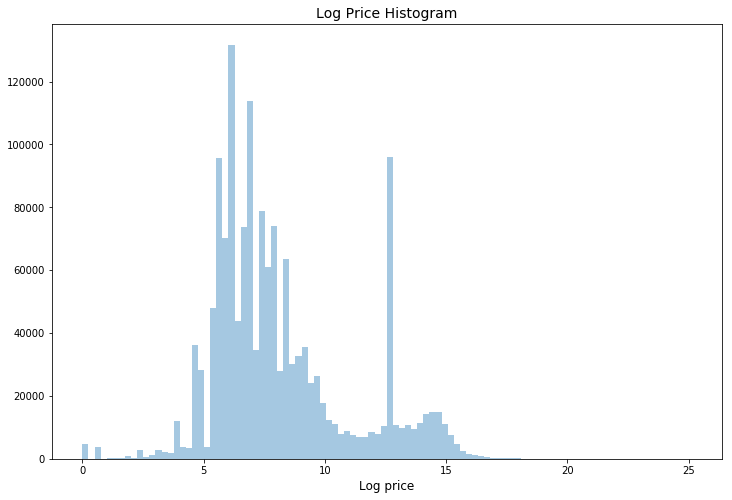

In [71]:
train['log_price'] = train['price']
train['log_price'].fillna(np.nanmean(train['price']), inplace=True)
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train['log_price'].values), bins=100, kde=False)
plt.xlabel('Log price', fontsize=12)
plt.title('Log Price Histogram', fontsize=14)
plt.show()

We can conclude that as expected the price is quite correlated (in a monotonic way) to the target variable.
<br>We can also observe that it has really high variance.</br>
<br>Because of the high variance and really high values we created the 'log_price' feature</br>

### Params

In [72]:
print('Number of param_1:', train['param_1'].nunique())
print('Number of param_2:', train['param_2'].nunique())
print('Number of param_3:', train['param_3'].nunique())

Number of param_1: 371
Number of param_2: 271
Number of param_3: 1219


We can see the number of unique values for each param is quite small

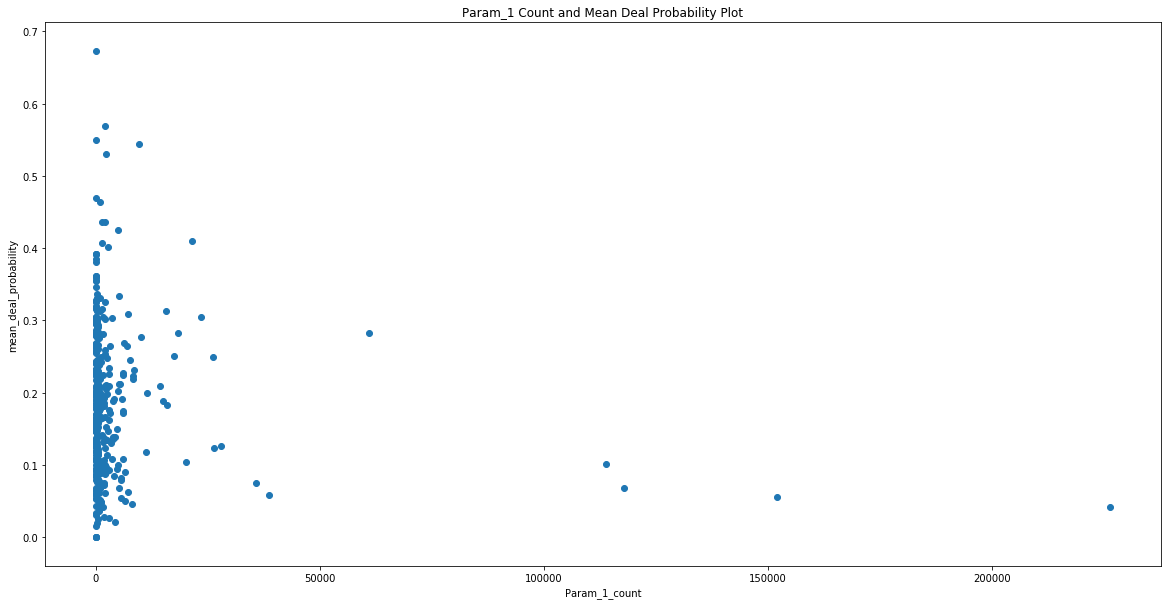

In [73]:
check = train[['param_1','deal_probability']]
param_1_mean = check.groupby('param_1').mean()
param_1_mean = param_1_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_1_count = check.groupby('param_1').count()
param_1_count = param_1_count.rename(columns = {'deal_probability' : 'param_1_count'})
new_df = param_1_mean.join(param_1_count)
plt.scatter(new_df['param_1_count'], new_df['mean_deal_probability'])
plt.title("Param_1 Count and Mean Deal Probability Plot")
plt.xlabel("Param_1_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [74]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000      -0.109959
param_1_count                      -0.109959       1.000000
                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000      -0.094833
param_1_count                      -0.094833       1.000000
                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000      -0.065754
param_1_count                      -0.065754       1.000000


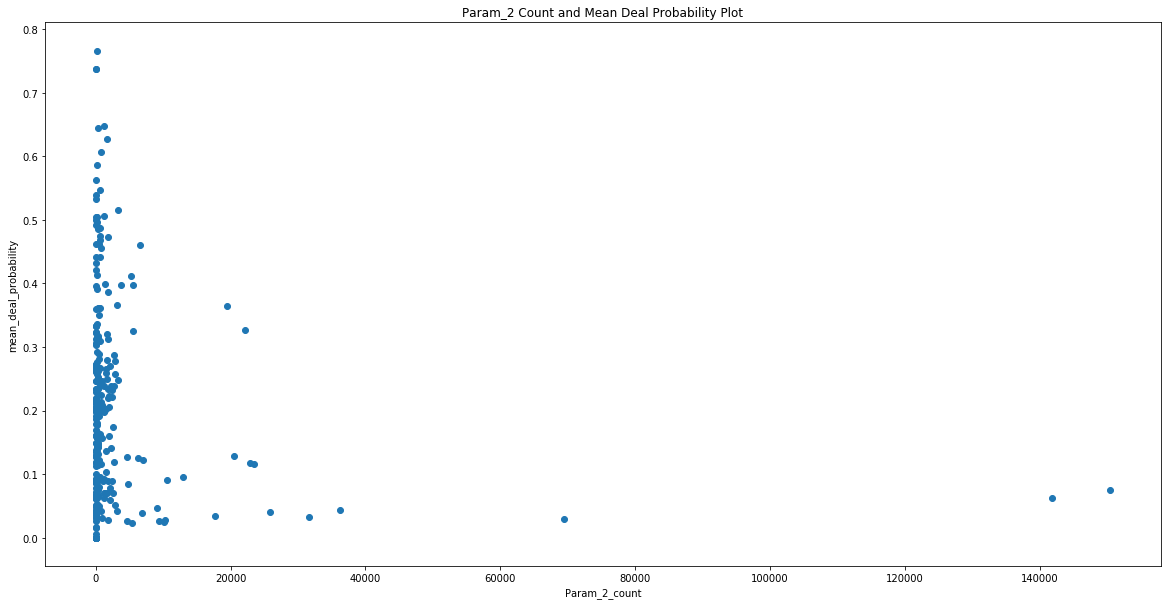

In [75]:
check = train[['param_2','deal_probability']]
param_2_mean = check.groupby('param_2').mean()
param_2_mean = param_2_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_2_count = check.groupby('param_2').count()
param_2_count = param_2_count.rename(columns = {'deal_probability' : 'param_2_count'})
new_df = param_2_mean.join(param_2_count)
plt.scatter(new_df['param_2_count'], new_df['mean_deal_probability'])
plt.title("Param_2 Count and Mean Deal Probability Plot")
plt.xlabel("Param_2_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [76]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  param_2_count
mean_deal_probability               1.000000      -0.134721
param_2_count                      -0.134721       1.000000
                       mean_deal_probability  param_2_count
mean_deal_probability               1.000000       0.080502
param_2_count                       0.080502       1.000000
                       mean_deal_probability  param_2_count
mean_deal_probability               1.000000       0.055385
param_2_count                       0.055385       1.000000


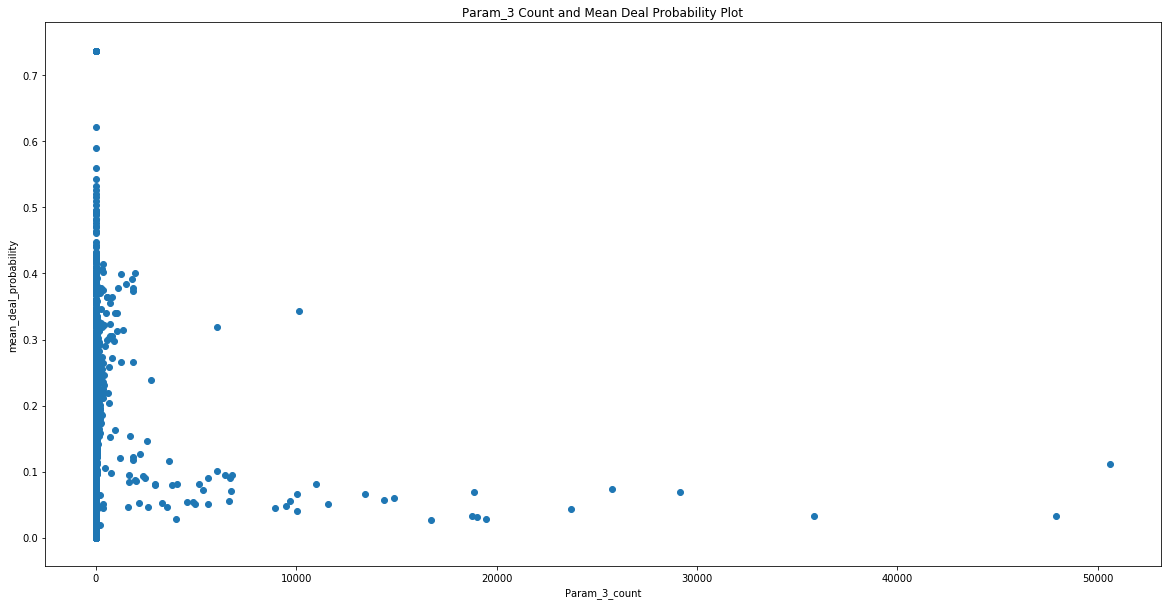

In [77]:
check = train[['param_3','deal_probability']]
param_3_mean = check.groupby('param_3').mean()
param_3_mean = param_3_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_3_count = check.groupby('param_3').count()
param_3_count = param_3_count.rename(columns = {'deal_probability' : 'param_3_count'})
new_df = param_3_mean.join(param_3_count)
plt.scatter(new_df['param_3_count'], new_df['mean_deal_probability'])
plt.title("Param_3 Count and Mean Deal Probability Plot")
plt.xlabel("Param_3_count")
plt.ylabel("mean_deal_probability")
plt.show()

### Missing Values

In [78]:
np.sum(train.isnull())/train.shape[0]*100

item_id                     0.000000
user_id                     0.000000
region                      0.000000
city                        0.000000
parent_category_name        0.000000
category_name               0.000000
param_1                     4.095718
param_2                    43.536753
param_3                    57.373369
title                       0.000000
description                 7.734079
price                       5.677839
item_seq_number             0.000000
activation_date             0.000000
user_type                   0.000000
image                       7.488772
image_top_1                 7.488772
deal_probability            0.000000
parent_category_name_en     0.000000
category_name_en            0.000000
param_1_en                  4.095718
param_2_en                 43.536753
param_3_en                 57.373369
is_power_user               0.000000
is_weak_user                0.000000
is_power_image              0.000000
weekday                     0.000000
m

We need to handle this missing values.
<br>Large portion of them are in the param_2 and param_3 columns.</br>
<br>It might be interesting to study the items that has NAN values. Let's create boolean features for them:</br>

In [79]:
train['has_description'] = train['description'].notna()
train['has_price'] = train['price'].notna()
train['has_params'] = train['param_1'].notna()
train['has_image'] = train['image'].notna()

## Feature Correlation

Pearson correlation:

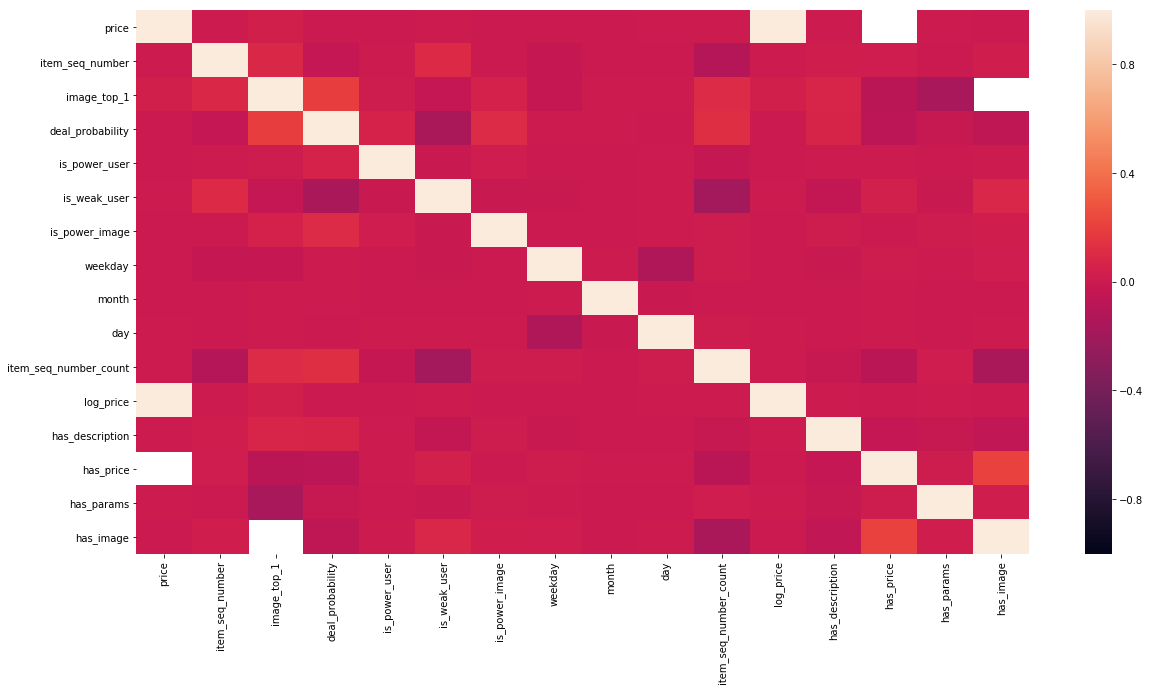

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,0.004246,0.034404,-0.001097,-0.000104,0.000305,-0.000264,-0.001174,-0.000009,0.000081,0.001170,1.000000e+00,0.001362,NaN,0.000661,-0.004528
item_seq_number,0.004246,1.000000,0.091472,-0.035744,0.002987,0.098150,-0.003625,-0.031065,-0.000192,-0.005955,-0.114798,4.227787e-03,0.029805,2.205070e-02,-0.001265,0.028060
image_top_1,0.034404,0.091472,1.000000,0.189979,0.014996,-0.034213,0.050039,-0.024776,0.001504,0.005849,0.104044,3.413508e-02,0.075407,-7.891624e-02,-0.170344,NaN
deal_probability,-0.001097,-0.035744,0.189979,1.000000,0.058472,-0.158277,0.101806,0.002096,0.003555,-0.002379,0.122152,-1.057329e-03,0.070184,-7.176968e-02,-0.016951,-0.056723
is_power_user,-0.000104,0.002987,0.014996,0.058472,1.000000,-0.012874,0.018906,-0.000643,-0.000096,0.003175,-0.026540,-1.014341e-04,0.007232,1.717019e-04,-0.001069,0.007551
is_weak_user,0.000305,0.098150,-0.034213,-0.158277,-0.012874,1.000000,-0.007979,-0.013675,-0.000799,0.005291,-0.194819,3.006219e-04,-0.044161,4.208042e-02,-0.012462,0.081956
is_power_image,-0.000264,-0.003625,0.050039,0.101806,0.018906,-0.007979,1.000000,-0.001558,-0.000211,0.003113,0.014771,-2.559720e-04,0.009251,-1.425944e-04,0.014342,0.024548
weekday,-0.001174,-0.031065,-0.024776,0.002096,-0.000643,-0.013675,-0.001558,1.000000,0.001407,-0.130194,0.011030,-1.141138e-03,-0.013075,1.024308e-02,0.000989,0.017421
month,-0.000009,-0.000192,0.001504,0.003555,-0.000096,-0.000799,-0.000211,0.001407,1.000000,-0.011558,-0.001137,-8.940228e-06,-0.000309,6.002974e-04,-0.000866,-0.000337
day,0.000081,-0.005955,0.005849,-0.002379,0.003175,0.005291,0.003113,-0.130194,-0.011558,1.000000,0.008277,7.861977e-05,-0.004407,2.358490e-04,-0.000352,0.001337


In [80]:
corr = train.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

Spearman correlation:

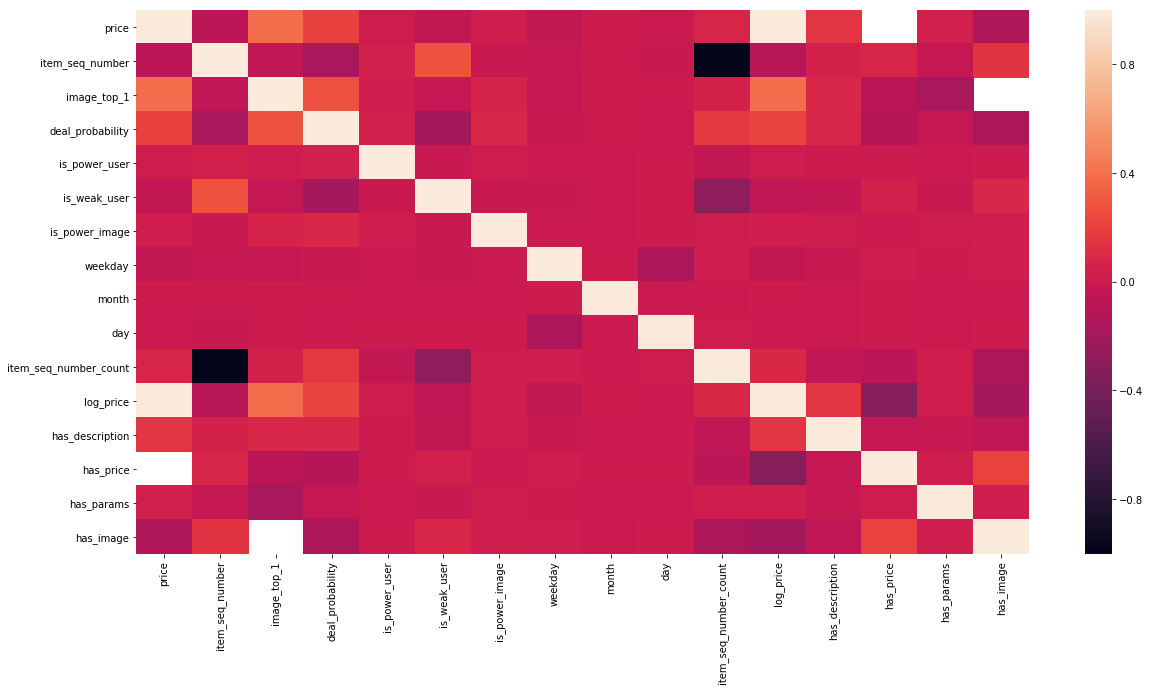

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.074789,0.389690,0.207315,0.012448,-0.041662,0.030926,-0.039930,0.001300,-0.006258,0.074814,1.000000,0.153525,NaN,0.036514,-0.132976
item_seq_number,-0.074789,1.000000,-0.047573,-0.169091,0.041371,0.277959,-0.011990,-0.021880,0.001277,-0.008836,-0.999986,-0.090003,0.053519,0.075768,-0.027751,0.146840
image_top_1,0.389690,-0.047573,1.000000,0.267342,0.015880,-0.034646,0.056937,-0.026194,0.001603,0.007010,0.047621,0.389111,0.078871,-0.085562,-0.165964,NaN
deal_probability,0.207315,-0.169091,0.267342,1.000000,0.041842,-0.181858,0.083657,-0.009674,0.002267,-0.002676,0.169126,0.223101,0.080661,-0.109453,-0.024471,-0.143610
is_power_user,0.012448,0.041371,0.015880,0.041842,1.000000,-0.012874,0.018906,-0.000615,-0.000096,0.003202,-0.041409,0.011070,0.007232,0.000172,-0.001069,0.007551
is_weak_user,-0.041662,0.277959,-0.034646,-0.181858,-0.012874,1.000000,-0.007979,-0.013328,-0.000799,0.005585,-0.278087,-0.051301,-0.044161,0.042080,-0.012462,0.081956
is_power_image,0.030926,-0.011990,0.056937,0.083657,0.018906,-0.007979,1.000000,-0.001525,-0.000211,0.003148,0.011984,0.026773,0.009251,-0.000143,0.014342,0.024548
weekday,-0.039930,-0.021880,-0.026194,-0.009674,-0.000615,-0.013328,-0.001525,1.000000,0.001361,-0.146979,0.021877,-0.041307,-0.012806,0.010055,0.000988,0.017217
month,0.001300,0.001277,0.001603,0.002267,-0.000096,-0.000799,-0.000211,0.001361,1.000000,-0.004249,-0.001276,0.001004,-0.000309,0.000600,-0.000866,-0.000337
day,-0.006258,-0.008836,0.007010,-0.002676,0.003202,0.005585,0.003148,-0.146979,-0.004249,1.000000,0.008838,-0.005750,-0.004191,0.000065,-0.000365,0.001107


In [81]:
corr = train.corr('spearman')
sns.heatmap(corr, vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

Kendall-tau correlation:

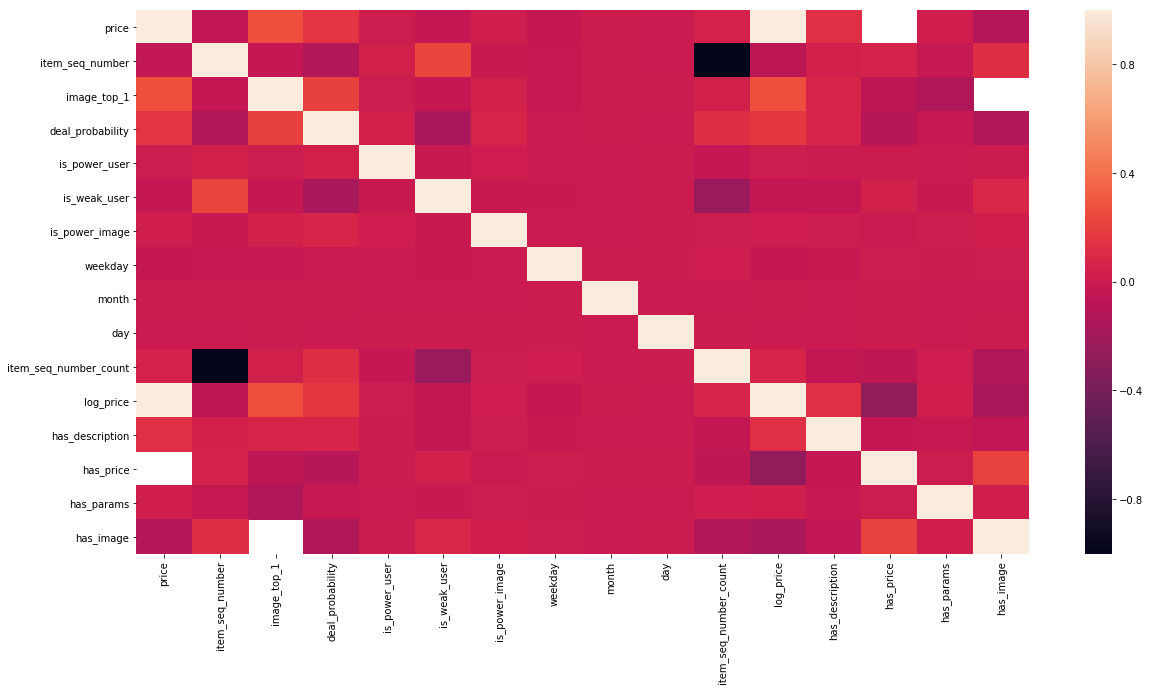

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.054446,0.265316,0.152752,0.010278,-0.034398,0.025534,-0.028809,0.001073,-0.004379,0.054476,1.000000,0.126757,NaN,0.030148,-0.109791
item_seq_number,-0.054446,1.000000,-0.033334,-0.124790,0.034004,0.228467,-0.009855,-0.015761,0.001050,-0.006164,-0.998556,-0.064580,0.043990,0.062277,-0.022810,0.120695
image_top_1,0.265316,-0.033334,1.000000,0.200738,0.012982,-0.028322,0.046544,-0.018675,0.001310,0.004856,0.033370,0.264824,0.064473,-0.069944,-0.135669,NaN
deal_probability,0.152752,-0.124790,0.200738,1.000000,0.038334,-0.166609,0.076642,-0.007715,0.002077,-0.002062,0.124839,0.163948,0.073897,-0.100275,-0.022419,-0.131569
is_power_user,0.010278,0.034004,0.012982,0.038334,1.000000,-0.012874,0.018906,-0.000537,-0.000096,0.002706,-0.034040,0.009143,0.007232,0.000172,-0.001069,0.007551
is_weak_user,-0.034398,0.228467,-0.028322,-0.166609,-0.012874,1.000000,-0.007979,-0.011636,-0.000799,0.004721,-0.228600,-0.042371,-0.044161,0.042080,-0.012462,0.081956
is_power_image,0.025534,-0.009855,0.046544,0.076642,0.018906,-0.007979,1.000000,-0.001332,-0.000211,0.002661,0.009852,0.022113,0.009251,-0.000143,0.014342,0.024548
weekday,-0.028809,-0.015761,-0.018675,-0.007715,-0.000537,-0.011636,-0.001332,1.000000,0.001188,0.005741,0.015762,-0.029812,-0.011180,0.008779,0.000862,0.015031
month,0.001073,0.001050,0.001310,0.002077,-0.000096,-0.000799,-0.000211,0.001188,1.000000,-0.003591,-0.001049,0.000829,-0.000309,0.000600,-0.000866,-0.000337
day,-0.004379,-0.006164,0.004856,-0.002062,0.002706,0.004721,0.002661,0.005741,-0.003591,1.000000,0.006169,-0.004026,-0.003542,0.000055,-0.000308,0.000935


In [82]:
corr = train.corr('kendall')
sns.heatmap(corr, vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

We can observe that the price,image_top_1,item_seq_number and param_count are the most correlated features with the target variable.
<br>We can also see that log_price has better correlation than price so it might be better to use it</br>
<br>Finally we can see an almost perfect negative correlation between item_seq_number and item_seq_number_count so it might be redundant to use both for predictions.</br>

Mutual Information:

In [83]:
partial_train = train[:50000]

In [84]:
price_mutual_info = metrics.adjusted_mutual_info_score(partial_train['price'], partial_train['deal_probability'])
print('price MI:',price_mutual_info)

price MI: 0.07028882637045923


In [85]:
item_seq_number_mutual_info = metrics.adjusted_mutual_info_score(partial_train['item_seq_number'], partial_train['deal_probability'])
print('item_seq_number MI:',item_seq_number_mutual_info)

item_seq_number MI: -0.008528054284717597


In [86]:
image_top_1_mutual_info = metrics.adjusted_mutual_info_score(partial_train['image_top_1'], partial_train['deal_probability'])
print('image_top_1 MI:',image_top_1_mutual_info)

image_top_1 MI: 0.04991963671167028


In [87]:
is_power_user_mutual_info = metrics.adjusted_mutual_info_score(partial_train['is_power_user'], partial_train['deal_probability'])
print('is_power_user MI:',is_power_user_mutual_info)

is_power_user MI: 0.00019848383283286222


In [88]:
is_weak_user_mutual_info = metrics.adjusted_mutual_info_score(partial_train['is_weak_user'], partial_train['deal_probability'])
print('is_weak_user MI:',is_weak_user_mutual_info)

is_weak_user MI: 0.003735611732327429


We didn't learn much from the MI..

### Deal Classes

Let's seperate the data by the deal probabilities:

In [89]:
deal_class_1 = train[(0 <= train['deal_probability']) &  (train['deal_probability'] < 0.2)]
deal_class_2 = train[(0.2 <= train['deal_probability']) &  (train['deal_probability'] < 0.4)]
deal_class_3 = train[(0.4 <= train['deal_probability']) &  (train['deal_probability'] < 0.6)]
deal_class_4 = train[(0.6 <= train['deal_probability']) &  (train['deal_probability'] < 0.8)]
deal_class_5 = train[(0.8 <= train['deal_probability']) &  (train['deal_probability'] <= 1)]

deal_class_1 percentage of values:  78.0099293346388 and mean price is:  353864.1274646506
Pearson correlation:


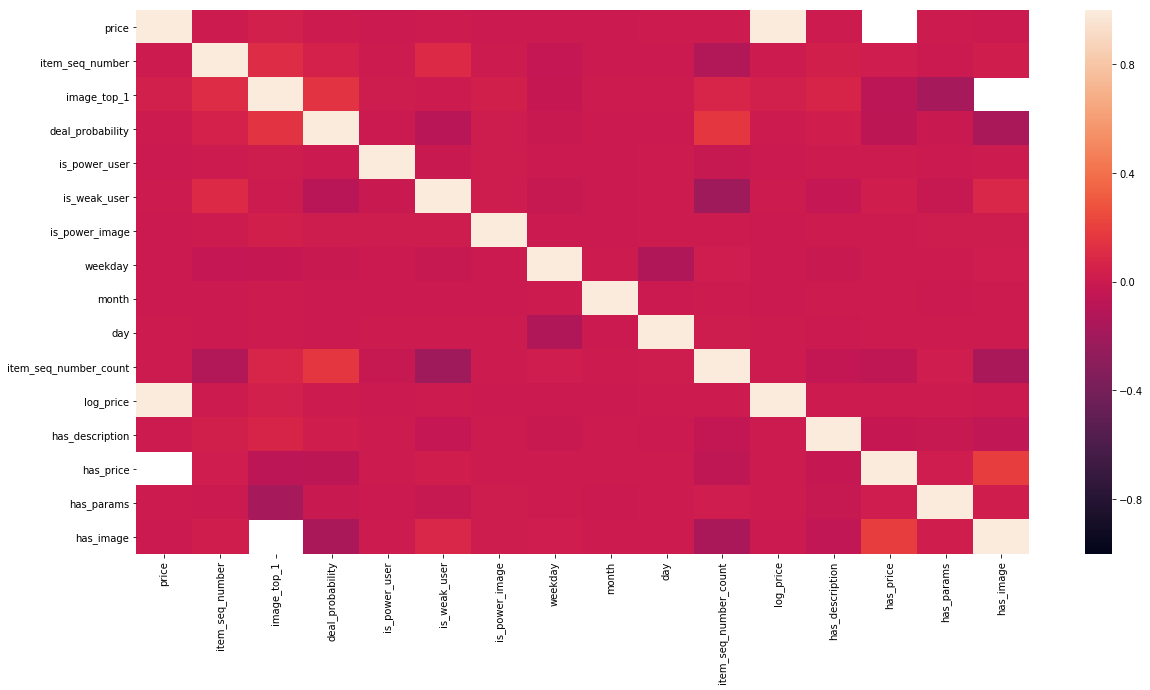

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,0.004270,0.041619,0.001724,-0.000047,0.000135,-0.000085,-0.001234,-0.000005,0.000105,0.001457,1.000000,0.001439,NaN,0.000597,-0.005272
item_seq_number,0.004270,1.000000,0.112072,0.049279,0.001389,0.094949,0.002233,-0.034257,-0.000220,-0.005601,-0.119747,0.004255,0.035474,0.018698,-0.003494,0.025890
image_top_1,0.041619,0.112072,1.000000,0.148034,0.009496,0.000560,0.038187,-0.030207,0.002683,0.006735,0.071296,0.041146,0.069776,-0.075605,-0.175275,NaN
deal_probability,0.001724,0.049279,0.148034,1.000000,-0.002537,-0.091197,0.008501,-0.013200,-0.000649,-0.003342,0.157837,0.001650,0.028695,-0.067074,-0.008842,-0.153100
is_power_user,-0.000047,0.001389,0.009496,-0.002537,1.000000,-0.009168,0.011964,-0.002173,-0.000039,0.003128,-0.016156,-0.000046,0.004664,0.000010,-0.000563,0.002755
is_weak_user,0.000135,0.094949,0.000560,-0.091197,-0.009168,1.000000,0.010443,-0.015868,-0.000595,0.005753,-0.204797,0.000136,-0.034780,0.030528,-0.021126,0.082260
is_power_image,-0.000085,0.002233,0.038187,0.008501,0.011964,0.010443,1.000000,-0.002410,-0.000095,0.003164,0.001514,-0.000083,0.005973,0.000382,0.008091,0.015305
weekday,-0.001234,-0.034257,-0.030207,-0.013200,-0.002173,-0.015868,-0.002410,1.000000,0.000831,-0.130666,0.015633,-0.001207,-0.013734,0.006981,0.002208,0.016861
month,-0.000005,-0.000220,0.002683,-0.000649,-0.000039,-0.000595,-0.000095,0.000831,1.000000,-0.007607,0.000275,-0.000005,0.000494,0.000342,-0.002479,0.000411
day,0.000105,-0.005601,0.006735,-0.003342,0.003128,0.005753,0.003164,-0.130666,-0.007607,1.000000,0.009179,0.000103,-0.004488,0.001878,0.000131,0.001118


Spearman correlation:


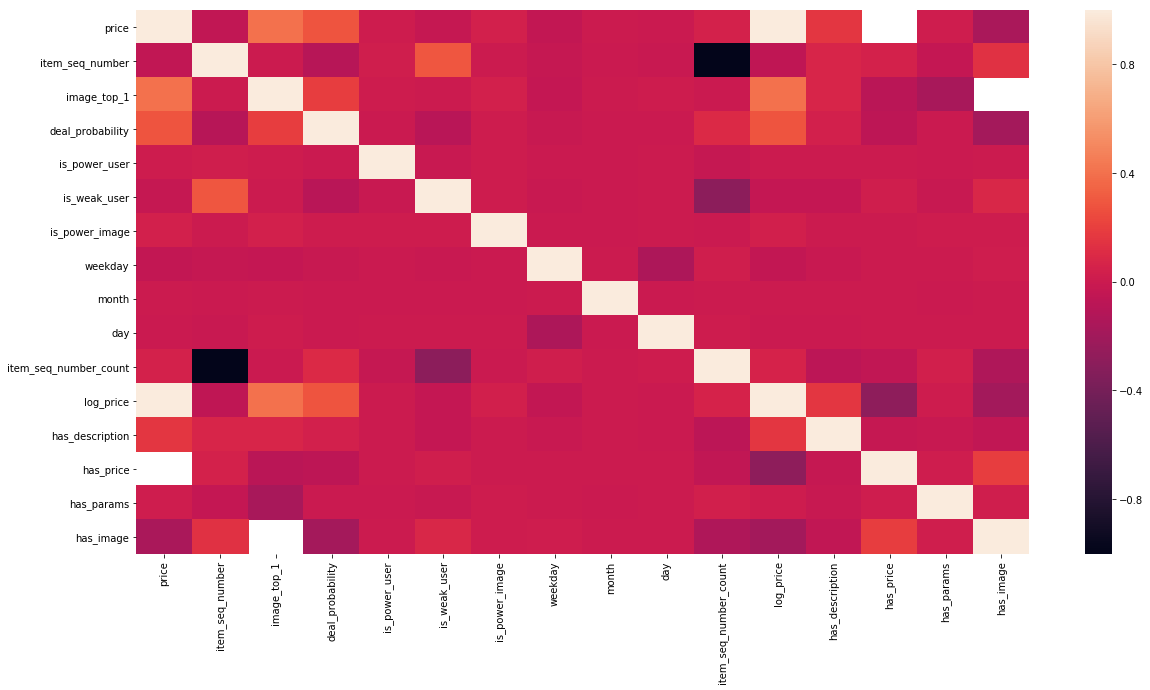

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.048829,0.400841,0.282204,0.008154,-0.030812,0.041870,-0.045623,0.001920,-0.004697,0.048861,1.000000,0.157619,NaN,0.017714,-0.157547
item_seq_number,-0.048829,1.000000,0.005021,-0.097597,0.025709,0.293758,0.006513,-0.027833,-0.000714,-0.009554,-0.999981,-0.056577,0.076446,0.048336,-0.035177,0.139285
image_top_1,0.400841,0.005021,1.000000,0.194986,0.010526,0.002439,0.044492,-0.031432,0.002379,0.008076,-0.004953,0.401537,0.071052,-0.080253,-0.169615,NaN
deal_probability,0.282204,-0.097597,0.194986,1.000000,-0.003011,-0.089032,0.009417,-0.022367,-0.000717,-0.000917,0.097679,0.285825,0.044781,-0.066049,-0.003954,-0.182008
is_power_user,0.008154,0.025709,0.010526,-0.003011,1.000000,-0.009168,0.011964,-0.002184,-0.000039,0.003149,-0.025725,0.007554,0.004664,0.000010,-0.000563,0.002755
is_weak_user,-0.030812,0.293758,0.002439,-0.089032,-0.009168,1.000000,0.010443,-0.015461,-0.000595,0.006107,-0.293929,-0.037225,-0.034780,0.030528,-0.021126,0.082260
is_power_image,0.041870,0.006513,0.044492,0.009417,0.011964,0.010443,1.000000,-0.002364,-0.000095,0.003218,-0.006522,0.038192,0.005973,0.000382,0.008091,0.015305
weekday,-0.045623,-0.027833,-0.031432,-0.022367,-0.002184,-0.015461,-0.002364,1.000000,0.000792,-0.147952,0.027830,-0.045873,-0.013455,0.006792,0.002183,0.016701
month,0.001920,-0.000714,0.002379,-0.000717,-0.000039,-0.000595,-0.000095,0.000792,1.000000,-0.002777,0.000714,0.001755,0.000494,0.000342,-0.002479,0.000411
day,-0.004697,-0.009554,0.008076,-0.000917,0.003149,0.006107,0.003218,-0.147952,-0.002777,1.000000,0.009560,-0.004823,-0.004246,0.001731,0.000090,0.000903


Kendal-tau correlation:


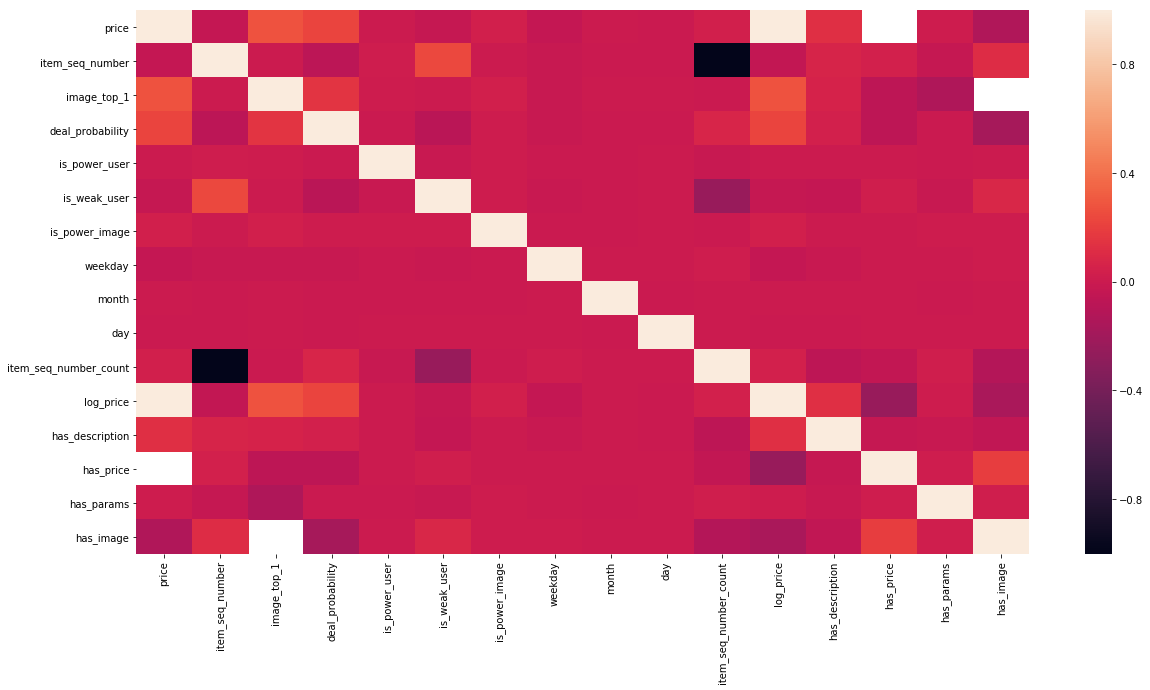

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.037059,0.275345,0.222487,0.006736,-0.025456,0.034591,-0.032928,0.001586,-0.003288,0.037096,1.000000,0.130219,NaN,0.014634,-0.130159
item_seq_number,-0.037059,1.000000,0.001902,-0.075531,0.021108,0.241188,0.005347,-0.020022,-0.000586,-0.006659,-0.998254,-0.042124,0.062765,0.039686,-0.028882,0.114359
image_top_1,0.275345,0.001902,1.000000,0.153580,0.008604,0.001994,0.036369,-0.022412,0.001944,0.005593,-0.001858,0.275705,0.058080,-0.065602,-0.138650,NaN
deal_probability,0.222487,-0.075531,0.153580,1.000000,-0.002885,-0.085321,0.009025,-0.018701,-0.000687,-0.000737,0.075613,0.225032,0.042915,-0.063296,-0.003789,-0.174423
is_power_user,0.006736,0.021108,0.008604,-0.002885,1.000000,-0.009168,0.011964,-0.001907,-0.000039,0.002662,-0.021125,0.006241,0.004664,0.000010,-0.000563,0.002755
is_weak_user,-0.025456,0.241188,0.001994,-0.085321,-0.009168,1.000000,0.010443,-0.013499,-0.000595,0.005162,-0.241368,-0.030752,-0.034780,0.030528,-0.021126,0.082260
is_power_image,0.034591,0.005347,0.036369,0.009025,0.011964,0.010443,1.000000,-0.002064,-0.000095,0.002720,-0.005356,0.031551,0.005973,0.000382,0.008091,0.015305
weekday,-0.032928,-0.020022,-0.022412,-0.018701,-0.001907,-0.013499,-0.002064,1.000000,0.000691,0.005009,0.020026,-0.033107,-0.011747,0.005929,0.001906,0.014581
month,0.001586,-0.000586,0.001944,-0.000687,-0.000039,-0.000595,-0.000095,0.000691,1.000000,-0.002348,0.000587,0.001450,0.000494,0.000342,-0.002479,0.000411
day,-0.003288,-0.006659,0.005593,-0.000737,0.002662,0.005162,0.002720,0.005009,-0.002348,1.000000,0.006668,-0.003377,-0.003589,0.001463,0.000076,0.000764


In [90]:
print('deal_class_1 percentage of values: ', len(deal_class_1)/train.shape[0]*100, 'and mean price is: ', deal_class_1['price'].mean())
print('Pearson correlation:')
corr = deal_class_1.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_1.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_1.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_2 percentage of values:  8.422241496743434 and mean price is:  326402.8185227325
Pearson correlation:


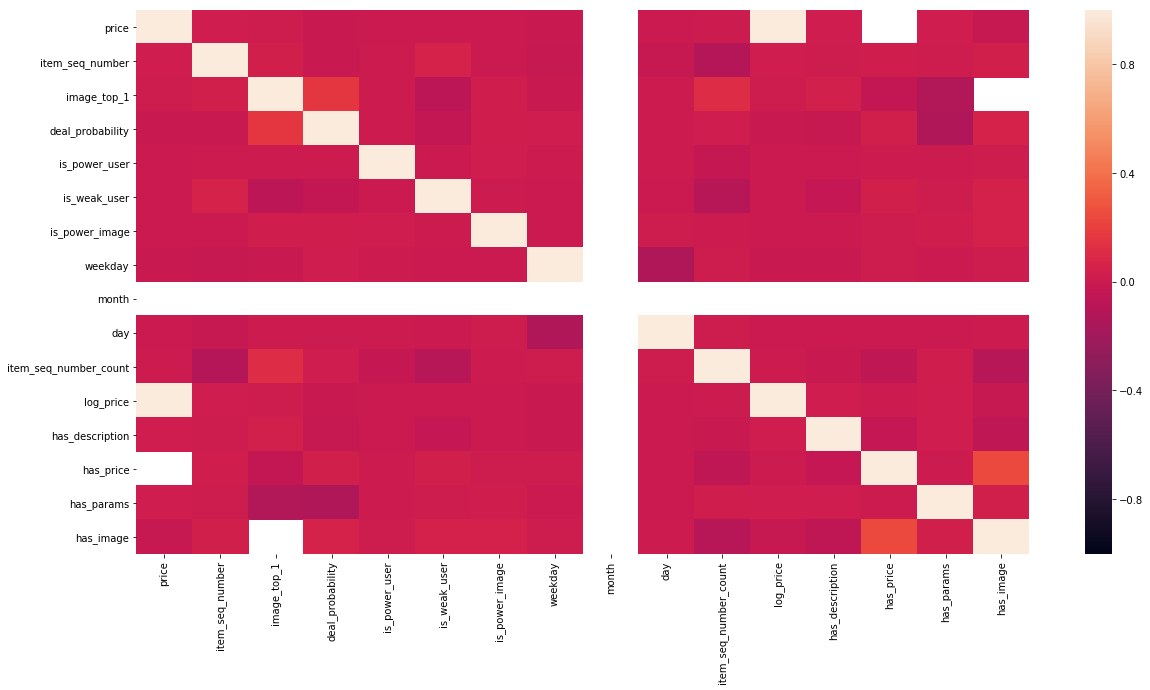

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,0.019088,0.012467,-0.008782,-0.001371,-0.002454,-0.006921,-0.011210,NaN,-0.002368,0.001825,1.000000,0.019013,NaN,0.017152,-0.019762
item_seq_number,0.019088,1.000000,0.038672,-0.013224,0.000889,0.058885,-0.002523,-0.018762,NaN,-0.017104,-0.107635,0.018975,0.015230,0.029486,0.012964,0.037878
image_top_1,0.012467,0.038672,1.000000,0.158480,0.000498,-0.075000,0.027478,-0.008426,NaN,0.001730,0.110533,0.012197,0.040064,-0.044301,-0.123131,NaN
deal_probability,-0.008782,-0.013224,0.158480,1.000000,0.005491,-0.045304,0.028326,0.015880,NaN,0.003184,0.016294,-0.008065,-0.021104,0.034914,-0.128193,0.059811
is_power_user,-0.001371,0.000889,0.000498,0.005491,1.000000,-0.003815,0.017308,0.005160,NaN,0.007348,-0.026303,-0.001330,-0.002151,0.007553,0.004633,0.011977
is_weak_user,-0.002454,0.058885,-0.075000,-0.045304,-0.003815,1.000000,0.000256,-0.000493,NaN,-0.002927,-0.099187,-0.002380,-0.034923,0.035326,0.013126,0.049857
is_power_image,-0.006921,-0.002523,0.027478,0.028326,0.017308,0.000256,1.000000,-0.005444,NaN,0.009043,0.002282,-0.006574,-0.003552,0.012637,0.027016,0.050814
weekday,-0.011210,-0.018762,-0.008426,0.015880,0.005160,-0.000493,-0.005444,1.000000,NaN,-0.134028,0.011218,-0.010442,-0.013341,0.014518,-0.007437,0.014083
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.002368,-0.017104,0.001730,0.003184,0.007348,-0.002927,0.009043,-0.134028,NaN,1.000000,0.014604,-0.002210,-0.007338,-0.003166,-0.003361,0.003744


Spearman correlation:


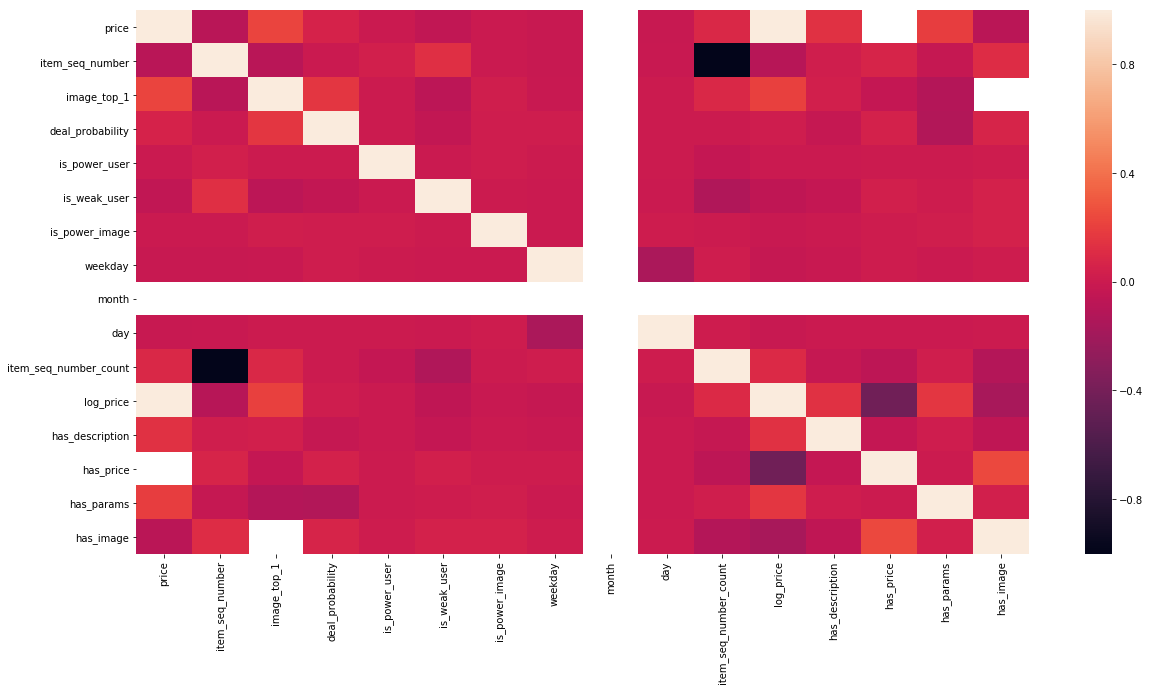

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.089926,0.226006,0.060309,-0.001396,-0.051405,-0.006732,-0.023387,NaN,-0.018809,0.089931,1.000000,0.140322,NaN,0.193003,-0.080124
item_seq_number,-0.089926,1.000000,-0.092250,-0.003223,0.034322,0.131779,-0.002517,-0.017694,NaN,-0.014671,-0.999996,-0.096371,0.025607,0.068209,-0.025878,0.114654
image_top_1,0.226006,-0.092250,1.000000,0.156394,0.000242,-0.070824,0.026510,-0.009356,NaN,0.000945,0.092255,0.204725,0.038705,-0.035330,-0.113335,NaN
deal_probability,0.060309,-0.003223,0.156394,1.000000,0.006338,-0.043243,0.017393,0.017854,NaN,0.002750,0.003223,0.021374,-0.025858,0.053831,-0.122358,0.064768
is_power_user,-0.001396,0.034322,0.000242,0.006338,1.000000,-0.003815,0.017308,0.005145,NaN,0.007344,-0.034333,-0.003960,-0.002151,0.007553,0.004633,0.011977
is_weak_user,-0.051405,0.131779,-0.070824,-0.043243,-0.003815,1.000000,0.000256,-0.000318,NaN,-0.002850,-0.131835,-0.058440,-0.034923,0.035326,0.013126,0.049857
is_power_image,-0.006732,-0.002517,0.026510,0.017393,0.017308,0.000256,1.000000,-0.005479,NaN,0.009086,0.002512,-0.015512,-0.003552,0.012637,0.027016,0.050814
weekday,-0.023387,-0.017694,-0.009356,0.017854,0.005145,-0.000318,-0.005479,1.000000,NaN,-0.149265,0.017698,-0.027939,-0.012854,0.014322,-0.007216,0.013740
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.018809,-0.014671,0.000945,0.002750,0.007344,-0.002850,0.009086,-0.149265,NaN,1.000000,0.014661,-0.015738,-0.007127,-0.003327,-0.003244,0.003573


Kendal-tau correlation:


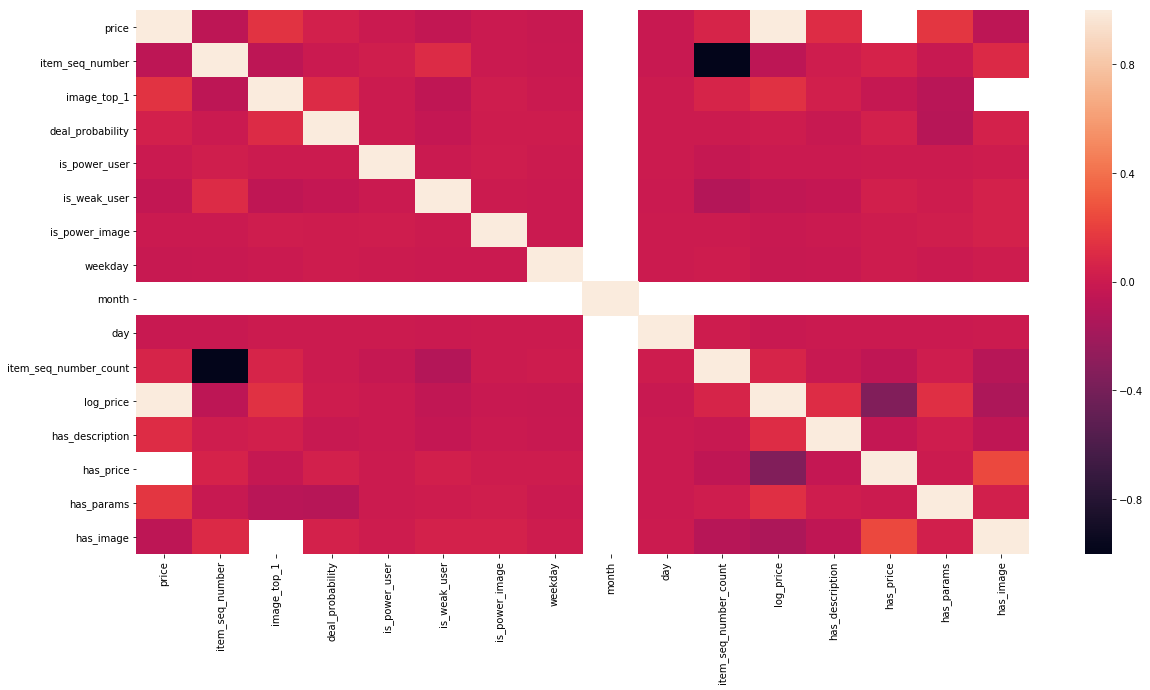

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.063517,0.146620,0.041517,-0.001148,-0.042293,-0.005538,-0.016840,NaN,-0.013096,0.063524,1.000000,0.115448,NaN,0.158790,-0.065921
item_seq_number,-0.063517,1.000000,-0.062718,-0.002140,0.028480,0.109349,-0.002089,-0.012850,NaN,-0.010308,-0.999368,-0.067806,0.021249,0.056599,-0.021473,0.095138
image_top_1,0.146620,-0.062718,1.000000,0.101885,0.000198,-0.057936,0.021686,-0.006679,NaN,0.000663,0.062725,0.133216,0.031661,-0.028901,-0.092711,NaN
deal_probability,0.041517,-0.002140,0.101885,1.000000,0.005199,-0.035475,0.014269,0.012783,NaN,0.001906,0.002140,0.015510,-0.021213,0.044161,-0.100377,0.053133
is_power_user,-0.001148,0.028480,0.000198,0.005199,1.000000,-0.003815,0.017308,0.004492,NaN,0.006208,-0.028491,-0.003278,-0.002151,0.007553,0.004633,0.011977
is_weak_user,-0.042293,0.109349,-0.057936,-0.035475,-0.003815,1.000000,0.000256,-0.000278,NaN,-0.002409,-0.109401,-0.048366,-0.034923,0.035326,0.013126,0.049857
is_power_image,-0.005538,-0.002089,0.021686,0.014269,0.017308,0.000256,1.000000,-0.004783,NaN,0.007680,0.002084,-0.012838,-0.003552,0.012637,0.027016,0.050814
weekday,-0.016840,-0.012850,-0.006679,0.012783,0.004492,-0.000278,-0.004783,1.000000,NaN,0.004057,0.012854,-0.020208,-0.011222,0.012504,-0.006300,0.011996
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.013096,-0.010308,0.000663,0.001906,0.006208,-0.002409,0.007680,0.004057,NaN,1.000000,0.010303,-0.011012,-0.006024,-0.002812,-0.002742,0.003020


In [91]:
print('deal_class_2 percentage of values: ', len(deal_class_2)/train.shape[0]*100, 'and mean price is: ', deal_class_2['price'].mean())
print('Pearson correlation:')
corr = deal_class_2.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_2.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_2.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_3 percentage of values:  2.0711389468307013 and mean price is:  269156.67680400284
Pearson correlation:


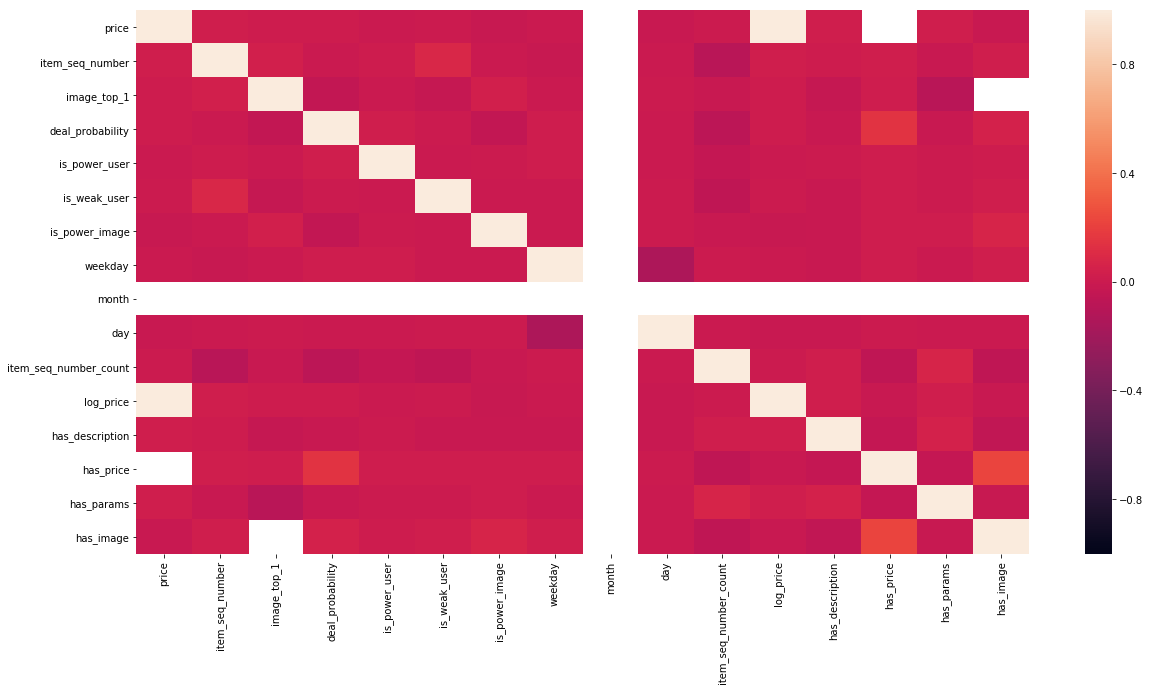

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,0.027795,0.011816,0.011120,-0.002250,0.000757,-0.017944,-0.006693,NaN,-0.009919,0.004746,1.000000,0.024394,NaN,0.025317,-0.013814
item_seq_number,0.027795,1.000000,0.034786,-0.003612,0.015081,0.085268,-0.004712,-0.017671,NaN,-0.001743,-0.092959,0.026910,0.009864,0.027503,-0.010068,0.030991
image_top_1,0.011816,0.034786,1.000000,-0.046308,-0.005319,-0.027518,0.031784,-0.005801,NaN,0.005620,-0.015024,0.011033,-0.025698,0.017400,-0.088541,NaN
deal_probability,0.011120,-0.003612,-0.046308,1.000000,0.023455,0.003302,-0.046224,0.021970,NaN,-0.001884,-0.077893,0.008178,-0.008412,0.144686,-0.012796,0.047420
is_power_user,-0.002250,0.015081,-0.005319,0.023455,1.000000,-0.002573,0.006893,0.019234,NaN,-0.000470,-0.036235,-0.002433,0.005313,0.016173,0.001030,0.013148
is_weak_user,0.000757,0.085268,-0.027518,0.003302,-0.002573,1.000000,-0.005237,-0.002092,NaN,0.003028,-0.057766,0.000488,-0.013397,0.018947,0.004153,0.028517
is_power_image,-0.017944,-0.004712,0.031784,-0.046224,0.006893,-0.005237,1.000000,-0.000947,NaN,0.004775,-0.011758,-0.016965,-0.012339,0.017672,0.021772,0.067049
weekday,-0.006693,-0.017671,-0.005801,0.021970,0.019234,-0.002092,-0.000947,1.000000,NaN,-0.140693,0.007504,-0.006295,-0.012920,0.017583,-0.007280,0.026135
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.009919,-0.001743,0.005620,-0.001884,-0.000470,0.003028,0.004775,-0.140693,NaN,1.000000,-0.004180,-0.008996,-0.012259,0.000769,-0.003454,-0.002248


Spearman correlation:


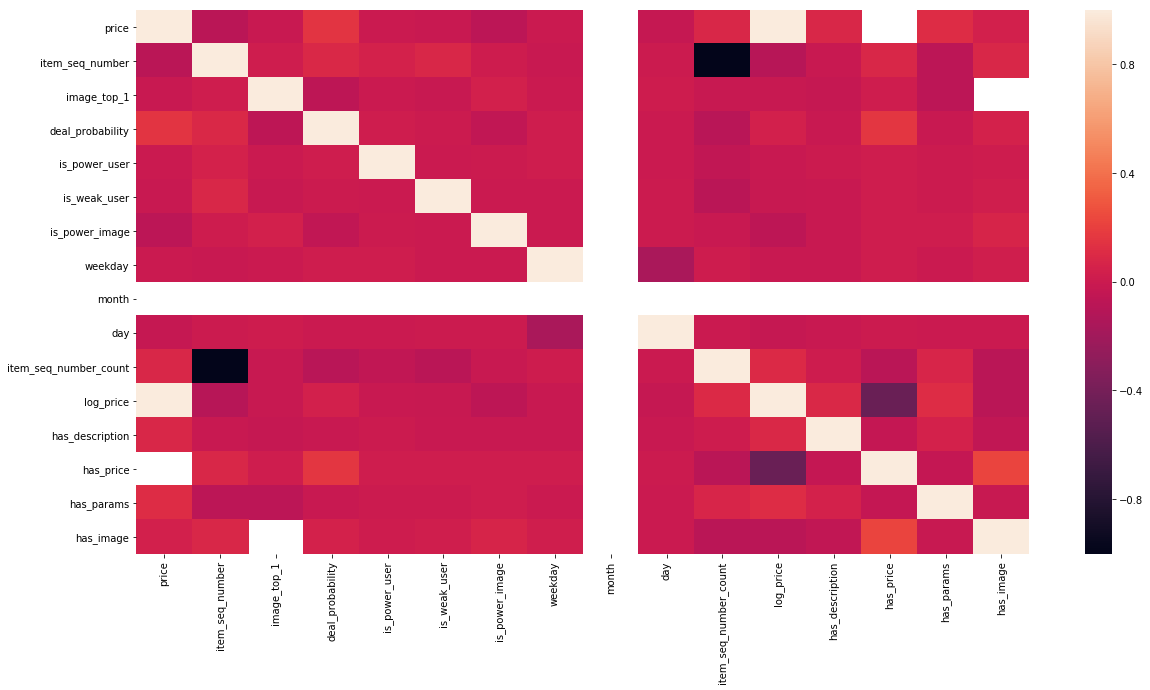

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.084196,-0.010606,0.148571,-0.006724,-0.012414,-0.074122,-0.005488,NaN,-0.029040,0.084202,1.000000,0.084485,NaN,0.116235,0.042830
item_seq_number,-0.084196,1.000000,0.021581,0.091734,0.049605,0.079335,0.010246,-0.009289,NaN,0.001434,-0.999997,-0.097126,-0.012881,0.079779,-0.070592,0.081937
image_top_1,-0.010606,0.021581,1.000000,-0.066751,-0.006728,-0.022131,0.039847,-0.007157,NaN,0.008277,-0.021583,-0.018854,-0.030131,0.016125,-0.071666,NaN
deal_probability,0.148571,0.091734,-0.066751,1.000000,0.022508,0.004714,-0.051593,0.021570,NaN,-0.004140,-0.091734,0.044596,-0.013467,0.158497,-0.015359,0.053123
is_power_user,-0.006724,0.049605,-0.006728,0.022508,1.000000,-0.002573,0.006893,0.019030,NaN,-0.000611,-0.049653,-0.012028,0.005313,0.016173,0.001030,0.013148
is_weak_user,-0.012414,0.079335,-0.022131,0.004714,-0.002573,1.000000,-0.005237,-0.001650,NaN,0.003265,-0.079313,-0.016187,-0.013397,0.018947,0.004153,0.028517
is_power_image,-0.074122,0.010246,0.039847,-0.051593,0.006893,-0.005237,1.000000,-0.000753,NaN,0.004909,-0.010264,-0.067879,-0.012339,0.017672,0.021772,0.067049
weekday,-0.005488,-0.009289,-0.007157,0.021570,0.019030,-0.001650,-0.000753,1.000000,NaN,-0.158205,0.009279,-0.015536,-0.012578,0.017524,-0.006926,0.025809
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.029040,0.001434,0.008277,-0.004140,-0.000611,0.003265,0.004909,-0.158205,NaN,1.000000,-0.001442,-0.023773,-0.012165,0.000717,-0.003293,-0.002451


Kendal-tau correlation:


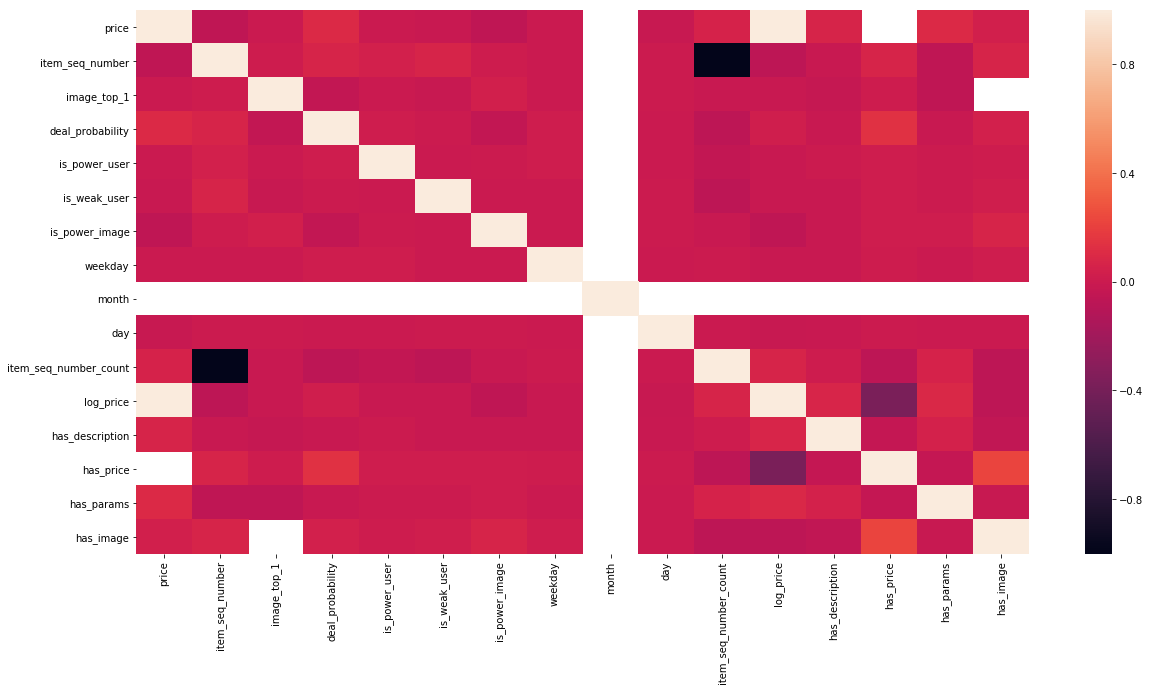

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.057473,-0.007360,0.099493,-0.005529,-0.010206,-0.060939,-0.004036,NaN,-0.020232,0.057481,1.000000,0.069460,NaN,0.095562,0.035212
item_seq_number,-0.057473,1.000000,0.015585,0.063580,0.041266,0.065998,0.008523,-0.006748,NaN,0.000987,-0.999487,-0.066783,-0.010716,0.066368,-0.058725,0.068163
image_top_1,-0.007360,0.015585,1.000000,-0.044587,-0.005520,-0.018158,0.032693,-0.005191,NaN,0.005725,-0.015588,-0.011765,-0.024721,0.013230,-0.058800,NaN
deal_probability,0.099493,0.063580,-0.044587,1.000000,0.018889,0.003956,-0.043298,0.015872,NaN,-0.002935,-0.063583,0.029344,-0.011302,0.133013,-0.012889,0.044581
is_power_user,-0.005529,0.041266,-0.005520,0.018889,1.000000,-0.002573,0.006893,0.016617,NaN,-0.000516,-0.041307,-0.010001,0.005313,0.016173,0.001030,0.013148
is_weak_user,-0.010206,0.065998,-0.018158,0.003956,-0.002573,1.000000,-0.005237,-0.001441,NaN,0.002760,-0.065982,-0.013459,-0.013397,0.018947,0.004153,0.028517
is_power_image,-0.060939,0.008523,0.032693,-0.043298,0.006893,-0.005237,1.000000,-0.000657,NaN,0.004149,-0.008539,-0.056439,-0.012339,0.017672,0.021772,0.067049
weekday,-0.004036,-0.006748,-0.005191,0.015872,0.016617,-0.001441,-0.000657,1.000000,NaN,-0.002712,0.006742,-0.011340,-0.010983,0.015302,-0.006048,0.022537
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.020232,0.000987,0.005725,-0.002935,-0.000516,0.002760,0.004149,-0.002712,NaN,1.000000,-0.000992,-0.016747,-0.010283,0.000606,-0.002783,-0.002072


In [92]:
print('deal_class_3 percentage of values: ', len(deal_class_3)/train.shape[0]*100, 'and mean price is: ', deal_class_3['price'].mean())
print('Pearson correlation:')
corr = deal_class_3.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_3.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_3.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_4 percentage of values:  5.061246860499765 and mean price is:  127500.35689430499
Pearson correlation:


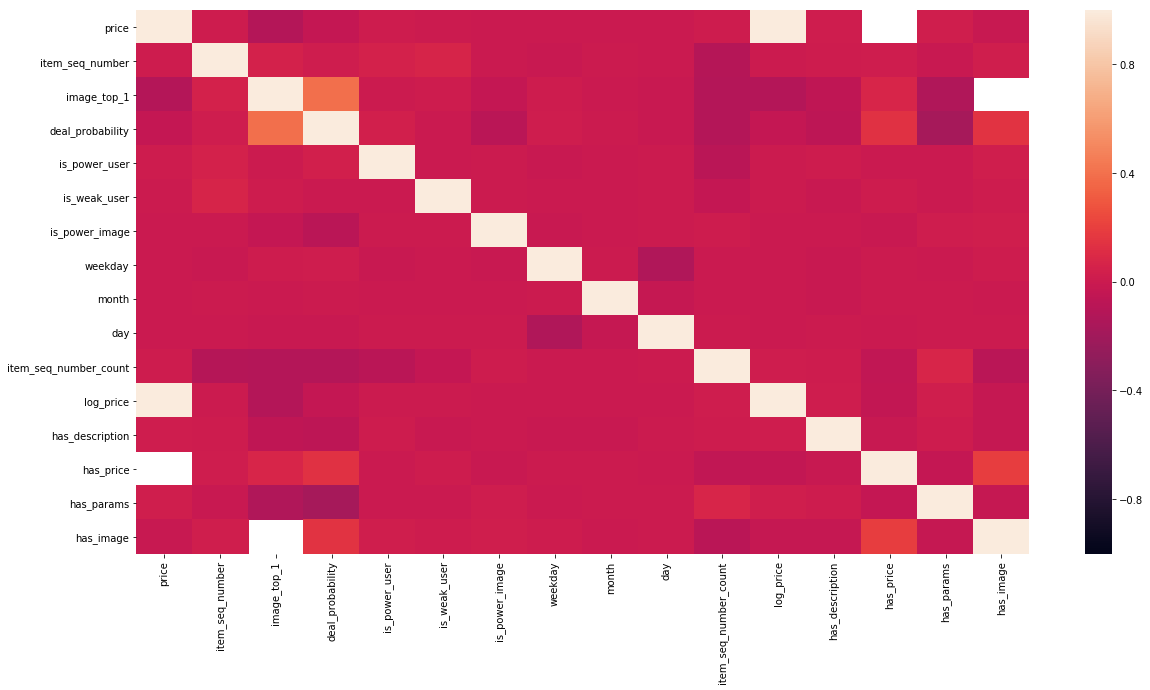

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,0.008341,-0.110892,-0.031662,0.007950,0.000636,-0.002111,-0.007121,-0.000136,-0.002873,0.015374,1.000000,0.016139,NaN,0.028591,-0.017154
item_seq_number,0.008341,1.000000,0.047985,0.018048,0.051300,0.067875,-0.006658,-0.015254,0.001552,-0.003855,-0.107884,0.007257,0.010357,0.022565,-0.009099,0.029794
image_top_1,-0.110892,0.047985,1.000000,0.396083,0.005877,0.008702,-0.036075,0.011447,-0.000843,-0.009199,-0.111763,-0.113727,-0.061238,0.077515,-0.128818,NaN
deal_probability,-0.031662,0.018048,0.396083,1.000000,0.032254,-0.001394,-0.078546,0.021119,0.000925,-0.013726,-0.115993,-0.034313,-0.063487,0.138963,-0.176097,0.140638
is_power_user,0.007950,0.051300,0.005877,0.032254,1.000000,-0.003402,0.006449,-0.013727,-0.000577,0.005019,-0.080360,0.007670,0.013054,-0.001847,-0.007691,0.025034
is_weak_user,0.000636,0.067875,0.008702,-0.001394,-0.003402,1.000000,0.000718,-0.002611,-0.000232,0.002467,-0.033396,0.000238,-0.008682,0.008486,-0.006748,0.011019
is_power_image,-0.002111,-0.006658,-0.036075,-0.078546,0.006449,0.000718,1.000000,-0.009640,-0.000560,0.001883,0.011618,-0.001309,-0.000342,-0.014354,0.022890,0.029458
weekday,-0.007121,-0.015254,0.011447,0.021119,-0.013727,-0.002611,-0.009640,1.000000,0.001193,-0.128759,-0.000105,-0.007111,-0.010238,0.006466,-0.004936,0.011287
month,-0.000136,0.001552,-0.000843,0.000925,-0.000577,-0.000232,-0.000560,0.001193,1.000000,-0.027240,-0.005193,-0.000222,-0.013088,0.001880,0.001807,-0.004958
day,-0.002873,-0.003855,-0.009199,-0.013726,0.005019,0.002467,0.001883,-0.128759,-0.027240,1.000000,0.004847,-0.002501,0.000592,-0.005386,0.003084,0.001028


Spearman correlation:


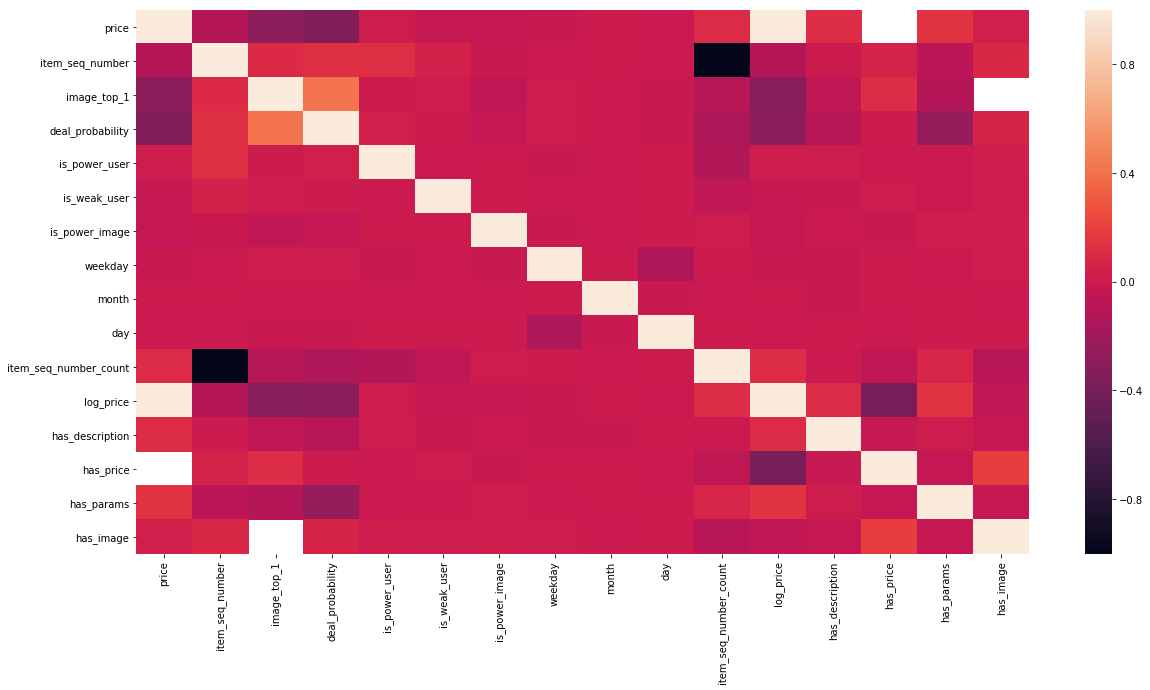

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.106160,-0.294784,-0.345487,0.008845,-0.019549,-0.038429,-0.012762,0.005660,-0.004189,0.106164,1.000000,0.110918,NaN,0.143953,0.031950
item_seq_number,-0.106160,1.000000,0.096648,0.130521,0.121387,0.050364,-0.015141,-0.003565,0.006822,-0.005480,-0.999996,-0.112850,0.000766,0.059227,-0.077020,0.092962
image_top_1,-0.294784,0.096648,1.000000,0.406951,0.000474,0.011459,-0.047193,0.012473,-0.000064,-0.008199,-0.096634,-0.313892,-0.058821,0.109909,-0.108691,NaN
deal_probability,-0.345487,0.130521,0.406951,1.000000,0.033381,0.003550,-0.038726,0.015346,-0.001550,-0.012295,-0.130515,-0.297386,-0.091046,0.003005,-0.249257,0.063126
is_power_user,0.008845,0.121387,0.000474,0.033381,1.000000,-0.003402,0.006449,-0.013421,-0.000577,0.005254,-0.121392,0.010403,0.013054,-0.001847,-0.007691,0.025034
is_weak_user,-0.019549,0.050364,0.011459,0.003550,-0.003402,1.000000,0.000718,-0.002610,-0.000232,0.002483,-0.050372,-0.020565,-0.008682,0.008486,-0.006748,0.011019
is_power_image,-0.038429,-0.015141,-0.047193,-0.038726,0.006449,0.000718,1.000000,-0.009691,-0.000560,0.001927,0.015138,-0.026778,-0.000342,-0.014354,0.022890,0.029458
weekday,-0.012762,-0.003565,0.012473,0.015346,-0.013421,-0.002610,-0.009691,1.000000,0.001132,-0.140042,0.003558,-0.014532,-0.010196,0.006493,-0.004910,0.011025
month,0.005660,0.006822,-0.000064,-0.001550,-0.000577,-0.000232,-0.000560,0.001132,1.000000,-0.010903,-0.006810,0.004083,-0.013088,0.001880,0.001807,-0.004958
day,-0.004189,-0.005480,-0.008199,-0.012295,0.005254,0.002483,0.001927,-0.140042,-0.010903,1.000000,0.005490,-0.001466,0.000406,-0.005401,0.003163,0.000869


Kendal-tau correlation:


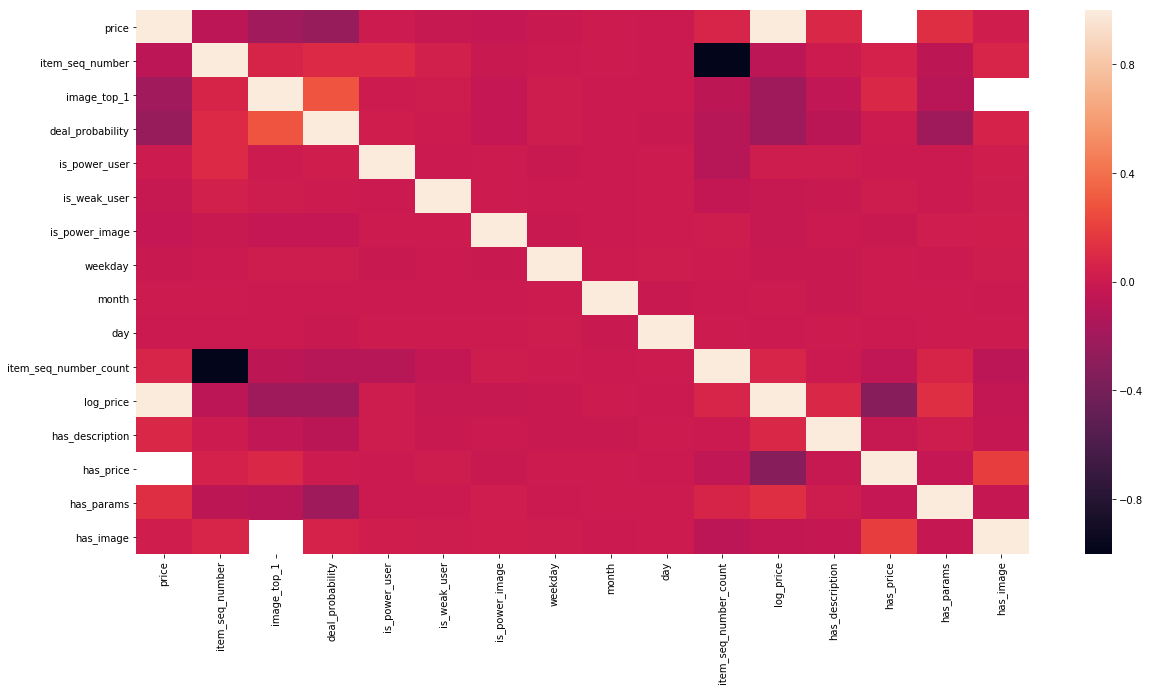

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.073040,-0.196021,-0.249014,0.007268,-0.016065,-0.031580,-0.009179,0.004651,-0.002917,0.073044,1.000000,0.091151,NaN,0.118298,0.026256
item_seq_number,-0.073040,1.000000,0.065842,0.093984,0.100267,0.041601,-0.012507,-0.002597,0.005635,-0.003837,-0.999344,-0.077500,0.000633,0.048922,-0.063620,0.076788
image_top_1,-0.196021,0.065842,1.000000,0.282792,0.000389,0.009419,-0.038791,0.008976,-0.000053,-0.005686,-0.065833,-0.209002,-0.048349,0.090341,-0.089341,NaN
deal_probability,-0.249014,0.093984,0.282792,1.000000,0.029230,0.003108,-0.033910,0.011750,-0.001357,-0.009102,-0.093981,-0.216516,-0.079725,0.002632,-0.218263,0.055277
is_power_user,0.007268,0.100267,0.000389,0.029230,1.000000,-0.003402,0.006449,-0.011716,-0.000577,0.004441,-0.100274,0.008567,0.013054,-0.001847,-0.007691,0.025034
is_weak_user,-0.016065,0.041601,0.009419,0.003108,-0.003402,1.000000,0.000718,-0.002278,-0.000232,0.002098,-0.041609,-0.016936,-0.008682,0.008486,-0.006748,0.011019
is_power_image,-0.031580,-0.012507,-0.038791,-0.033910,0.006449,0.000718,1.000000,-0.008460,-0.000560,0.001628,0.012505,-0.022053,-0.000342,-0.014354,0.022890,0.029458
weekday,-0.009179,-0.002597,0.008976,0.011750,-0.011716,-0.002278,-0.008460,1.000000,0.000988,0.010955,0.002593,-0.010466,-0.008900,0.005668,-0.004287,0.009625
month,0.004651,0.005635,-0.000053,-0.001357,-0.000577,-0.000232,-0.000560,0.000988,1.000000,-0.009215,-0.005625,0.003362,-0.013088,0.001880,0.001807,-0.004958
day,-0.002917,-0.003837,-0.005686,-0.009102,0.004441,0.002098,0.001628,0.010955,-0.009215,1.000000,0.003847,-0.001025,0.000343,-0.004564,0.002673,0.000734


In [93]:
print('deal_class_4 percentage of values: ', len(deal_class_4)/train.shape[0]*100, 'and mean price is: ', deal_class_4['price'].mean())
print('Pearson correlation:')
corr = deal_class_4.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_4.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_4.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_5 percentage of values:  6.435443361287302 and mean price is:  6002.106999407388
Pearson correlation:


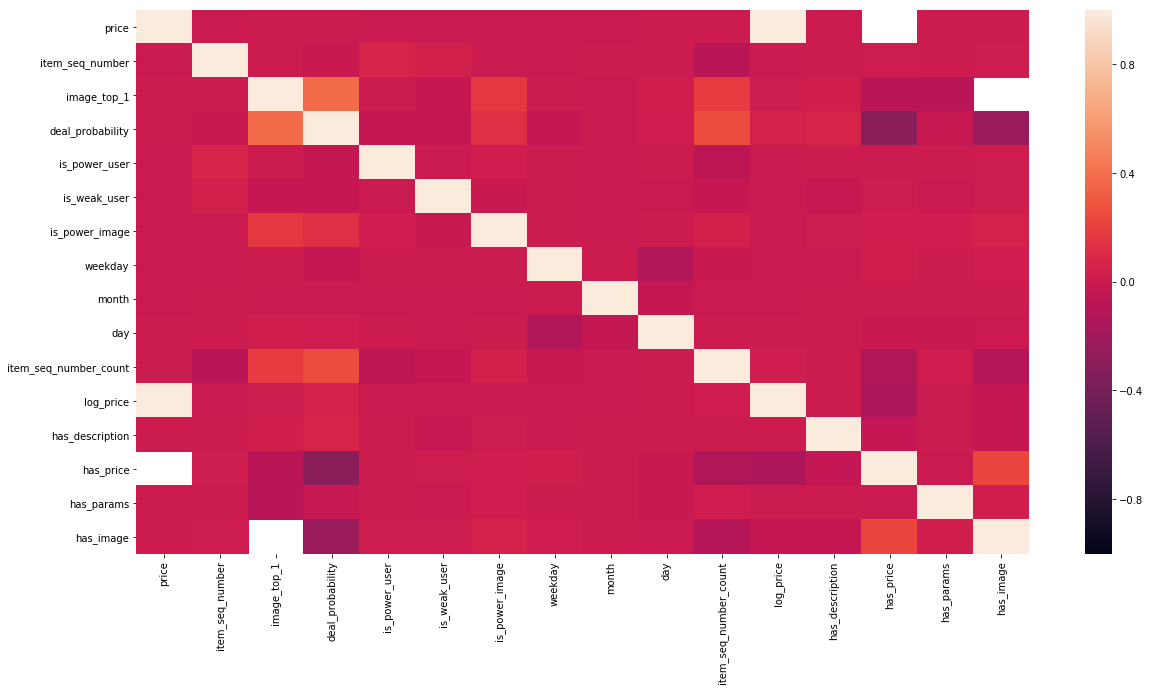

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.000046,0.004083,0.006523,-0.000154,-0.000480,-0.000789,-0.001506,-0.000060,0.005054,0.001898,1.000000,0.001651,NaN,0.001000,0.000887
item_seq_number,-0.000046,1.000000,0.003212,-0.008372,0.073122,0.040956,-0.003648,-0.007198,0.000129,0.001752,-0.082742,-0.002045,0.005944,0.014122,0.002160,0.013984
image_top_1,0.004083,0.003212,1.000000,0.375591,0.003011,-0.026946,0.171104,0.002393,-0.002337,0.026405,0.183983,0.014282,0.025323,-0.083169,-0.091251,NaN
deal_probability,0.006523,-0.008372,0.375591,1.000000,-0.023734,-0.025156,0.127883,-0.031911,-0.003735,0.017040,0.256159,0.049179,0.067791,-0.307221,-0.016451,-0.227935
is_power_user,-0.000154,0.073122,0.003011,-0.023734,1.000000,-0.004992,0.019096,0.005918,-0.000512,0.004549,-0.063808,-0.000920,0.003207,0.005445,0.003000,0.012723
is_weak_user,-0.000480,0.040956,-0.026946,-0.025156,-0.004992,1.000000,-0.009738,0.003381,-0.000302,-0.005528,-0.031181,-0.002035,-0.016032,0.011039,-0.001988,0.010404
is_power_image,-0.000789,-0.003648,0.171104,0.127883,0.019096,-0.009738,1.000000,0.001459,-0.001191,0.002031,0.042046,-0.003312,0.008131,0.017984,0.019733,0.048056
weekday,-0.001506,-0.007198,0.002393,-0.031911,0.005918,0.003381,0.001459,1.000000,0.005428,-0.117693,-0.010762,-0.005116,-0.005917,0.025903,0.004613,0.019556
month,-0.000060,0.000129,-0.002337,-0.003735,-0.000512,-0.000302,-0.001191,0.005428,1.000000,-0.028263,-0.004911,-0.000256,0.001233,0.001384,0.000720,0.001251
day,0.005054,0.001752,0.026405,0.017040,0.004549,-0.005528,0.002031,-0.117693,-0.028263,1.000000,0.006949,0.006452,0.002549,-0.011304,-0.009954,-0.005109


Spearman correlation:


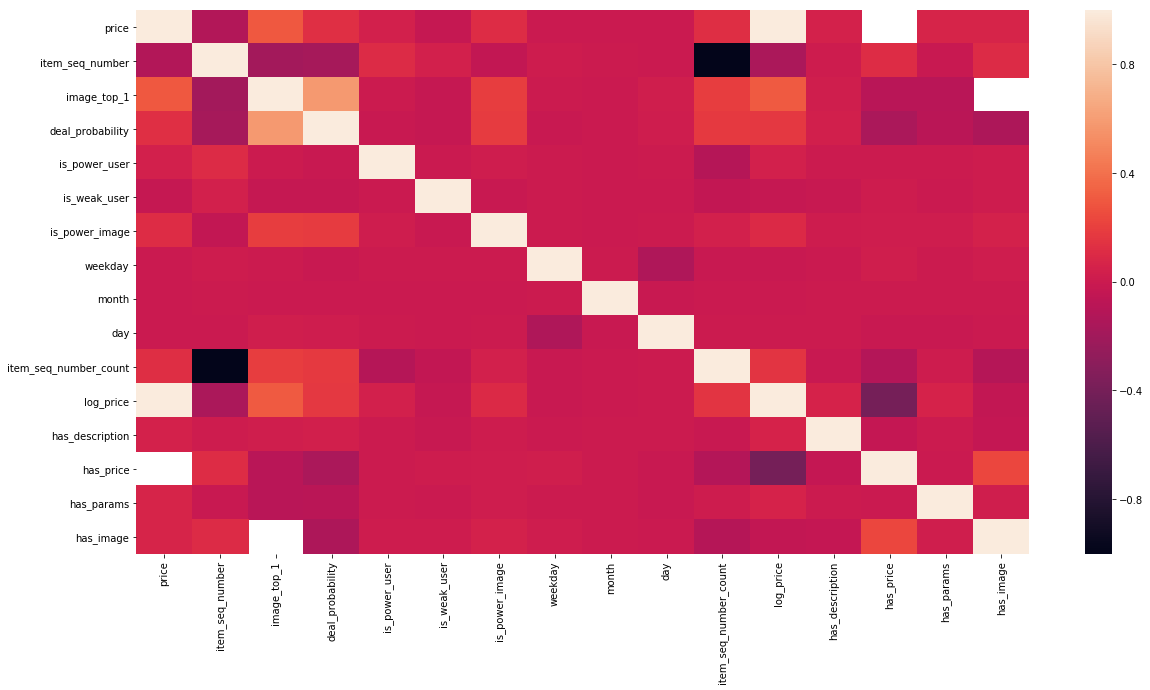

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.118099,0.304452,0.128251,0.046233,-0.027109,0.115674,-0.003071,-0.004742,-0.002267,0.118107,1.000000,0.047329,NaN,0.069278,0.067700
item_seq_number,-0.118099,1.000000,-0.187908,-0.174379,0.102671,0.041904,-0.039579,0.010547,0.007504,-0.006583,-0.999993,-0.149084,0.008415,0.111142,-0.013836,0.103361
image_top_1,0.304452,-0.187908,1.000000,0.582883,0.005567,-0.029160,0.192235,0.001583,-0.002279,0.026361,0.187895,0.308568,0.025543,-0.088761,-0.092145,NaN
deal_probability,0.128251,-0.174379,0.582883,1.000000,-0.014388,-0.026591,0.186082,-0.015488,-0.004617,0.020208,0.174374,0.167885,0.037982,-0.154686,-0.078230,-0.148403
is_power_user,0.046233,0.102671,0.005567,-0.014388,1.000000,-0.004992,0.019096,0.005799,-0.000512,0.004430,-0.102692,0.039087,0.003207,0.005445,0.003000,0.012723
is_weak_user,-0.027109,0.041904,-0.029160,-0.026591,-0.004992,1.000000,-0.009738,0.003422,-0.000302,-0.005558,-0.041909,-0.029124,-0.016032,0.011039,-0.001988,0.010404
is_power_image,0.115674,-0.039579,0.192235,0.186082,0.019096,-0.009738,1.000000,0.001454,-0.001191,0.001982,0.039592,0.096309,0.008131,0.017984,0.019733,0.048056
weekday,-0.003071,0.010547,0.001583,-0.015488,0.005799,0.003422,0.001454,1.000000,0.005274,-0.133844,-0.010564,-0.013211,-0.005945,0.025804,0.004740,0.019522
month,-0.004742,0.007504,-0.002279,-0.004617,-0.000512,-0.000302,-0.001191,0.005274,1.000000,-0.009670,-0.007516,-0.004895,0.001233,0.001384,0.000720,0.001251
day,-0.002267,-0.006583,0.026361,0.020208,0.004430,-0.005558,0.001982,-0.133844,-0.009670,1.000000,0.006587,0.002721,0.002625,-0.011649,-0.009962,-0.005355


Kendal-tau correlation:


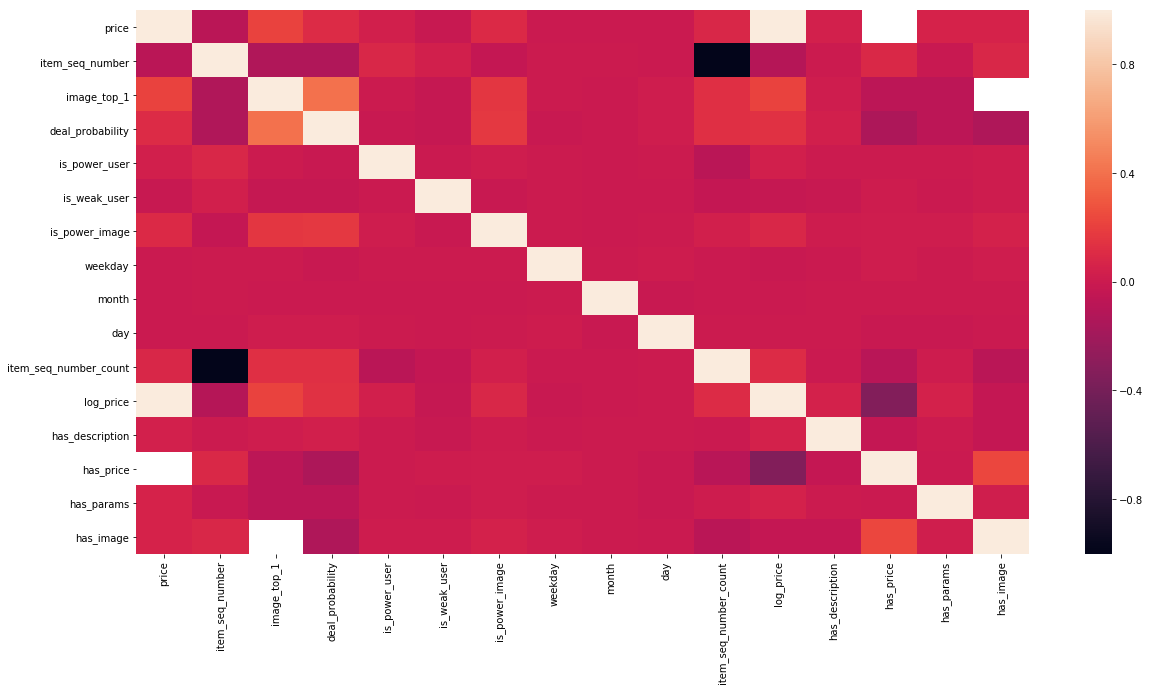

,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,has_description,has_price,has_params,has_image
price,1.000000,-0.082223,0.212546,0.104114,0.038442,-0.022541,0.096183,-0.002229,-0.003943,-0.001595,0.082230,1.000000,0.039354,NaN,0.057605,0.056292
item_seq_number,-0.082223,1.000000,-0.127321,-0.132711,0.084438,0.034462,-0.032550,0.007553,0.006171,-0.004594,-0.999127,-0.103767,0.006921,0.091404,-0.011379,0.085006
image_top_1,0.212546,-0.127321,1.000000,0.404026,0.004560,-0.023889,0.157491,0.001104,-0.001867,0.018258,0.127315,0.215213,0.020926,-0.072719,-0.075491,NaN
deal_probability,0.104114,-0.132711,0.404026,1.000000,-0.013213,-0.024419,0.170884,-0.012359,-0.004240,0.015710,0.132708,0.138677,0.034880,-0.142052,-0.071841,-0.136282
is_power_user,0.038442,0.084438,0.004560,-0.013213,1.000000,-0.004992,0.019096,0.005063,-0.000512,0.003744,-0.084457,0.032489,0.003207,0.005445,0.003000,0.012723
is_weak_user,-0.022541,0.034462,-0.023889,-0.024419,-0.004992,1.000000,-0.009738,0.002988,-0.000302,-0.004698,-0.034467,-0.024207,-0.016032,0.011039,-0.001988,0.010404
is_power_image,0.096183,-0.032550,0.157491,0.170884,0.019096,-0.009738,1.000000,0.001269,-0.001191,0.001675,0.032561,0.080051,0.008131,0.017984,0.019733,0.048056
weekday,-0.002229,0.007553,0.001104,-0.012359,0.005063,0.002988,0.001269,1.000000,0.004605,0.015394,-0.007566,-0.009585,-0.005191,0.022529,0.004138,0.017044
month,-0.003943,0.006171,-0.001867,-0.004240,-0.000512,-0.000302,-0.001191,0.004605,1.000000,-0.008173,-0.006182,-0.004069,0.001233,0.001384,0.000720,0.001251
day,-0.001595,-0.004594,0.018258,0.015710,0.003744,-0.004698,0.001675,0.015394,-0.008173,1.000000,0.004598,0.001915,0.002219,-0.009847,-0.008420,-0.004526


In [94]:
print('deal_class_5 percentage of values: ', len(deal_class_5)/train.shape[0]*100, 'and mean price is: ', deal_class_5['price'].mean())
print('Pearson correlation:')
corr = deal_class_5.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_5.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_5.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

First we notice that 80% of the items have very low deal probability(0-0.2).

We can see that as the probability increases - the mean price drops significantly (which is reasonable).

We can also see that there is an interesting correlation between the image_top_1 feature and the target variable which is the highest(0.4) for the class of 0.8-1.0 deal probability.

There is also some correlation between the price feature and the target variable and it is different between the classes - for the lowest probability class and the highest probability class it is positive (0.21,0.1), for the second and third class it is close to 0 and for the 4th class it is strictly negative(-0.27).

We can also see some mostly negative correlation between the item_seq_number,has_params/image/description/price features and the target variable in the highest probability class.

Finally we can see that there is a constant correlation of about 0.2 between has_price and has_image.

## train_active.csv

Some minor exploration of the train_active dataset.
<br>The file is very big so we take only a sample from it.</br>

In [ ]:
train_active = pd.read_csv(os.path.join(DATA_PATH, 'train_active.csv'), parse_dates=['activation_date'])

In [ ]:
train_active.columns

In [ ]:
np.sum(train_active.isnull())/train_active.shape[0]*100

In [ ]:
user_type_dist = train_active.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

In [ ]:
train_active['log_price'] = train_active['price']
train_active['log_price'].fillna(np.nanmean(train_active['price']), inplace=True)
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train_active['log_price'].values), bins=100, kde=False)
plt.xlabel('Log price', fontsize=12)
plt.title('Log Price Histogram', fontsize=14)
plt.show()

## periods_train.csv

Minor exploration of the periods_train dataset.

In [10]:
periods_train = pd.read_csv(os.path.join(DATA_PATH, 'periods_train.csv.zip'), parse_dates=['activation_date','date_from','date_to'])

In [11]:
periods_train.columns

Index(['item_id', 'activation_date', 'date_from', 'date_to'], dtype='object')

In [12]:
periods_train.describe()

,item_id,activation_date,date_from,date_to
count,16687412,16681622,16687412,16687412
unique,13812546,87,14,14
top,c5bc9e0c5700,2017-03-13 00:00:00,2017-03-15 00:00:00,2017-03-28 00:00:00
freq,14,539502,12070638,11221144
first,NaN,2017-01-01 00:00:00,2017-03-15 00:00:00,2017-03-15 00:00:00
last,NaN,2017-03-28 00:00:00,2017-03-28 00:00:00,2017-03-28 00:00:00


In [13]:
periods_train.shape

(16687412, 4)

## Relation between test and train

Taken from here: https://www.kaggle.com/bminixhofer/aggregated-features-lightgbm/notebook

In [ ]:
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), parse_dates=['activation_date'])

In [16]:
# !pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles
def get_venn(feature):
    venn2([
        set(train[feature].values), 
        set(test[feature].values)
    ], set_labels = ('train', 'test'))

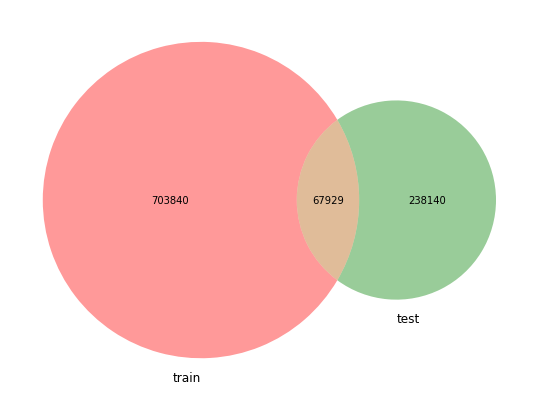

In [17]:
get_venn('user_id')

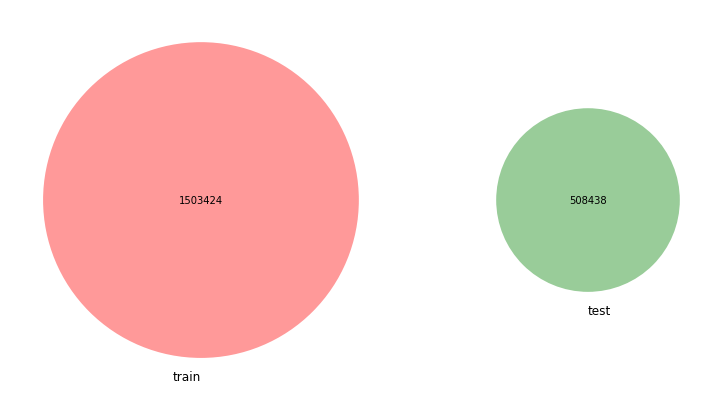

In [18]:
get_venn('item_id')

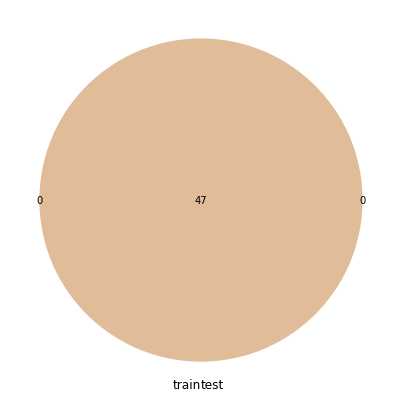

In [19]:
get_venn('category_name')

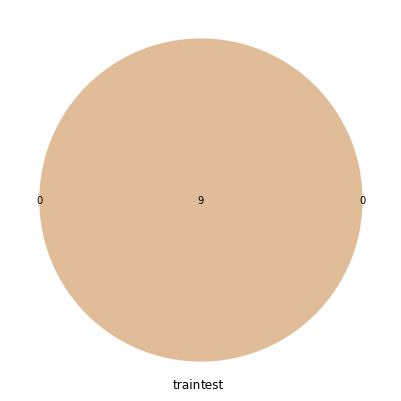

In [20]:
get_venn('parent_category_name')

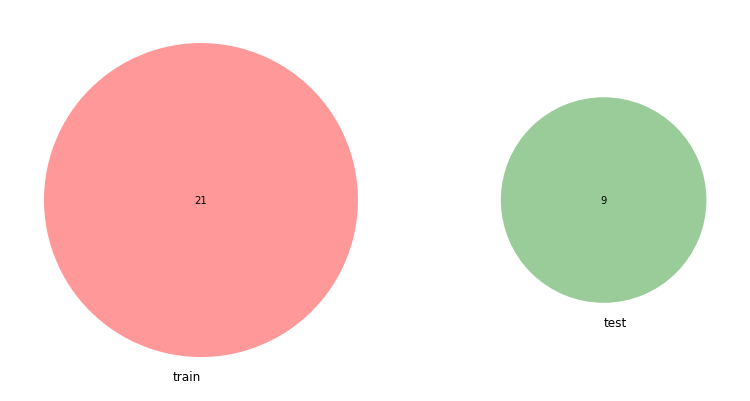

In [21]:
get_venn('activation_date')

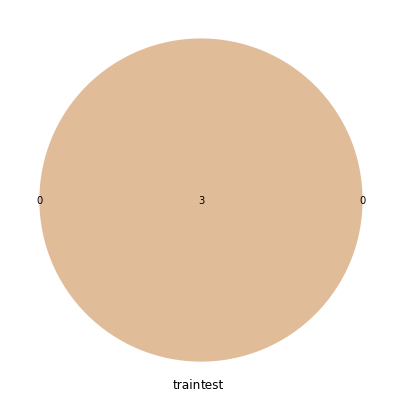

In [22]:
get_venn('user_type')

We can see that the train and test datasets has the same categories and user types.
<br>There are some overlaping user_id's, so it might be helpfull to include the user_id in the prediction model.</br>
<br>Finally, we can see that the item_id and activation_date are completly different between the two datasets, so it might not be a good idea to include them in the prediction model.</br>